In [24]:
import numpy as np
from numpy import array
from numpy import argmax
from numpy import genfromtxt
import scipy
import pandas as pd
import math
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import shap
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import matplotlib.pyplot as plt
from Codebase import ConfusionMatrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R
from sklearn.model_selection import KFold

In [8]:
class Valuestandard:
    def __init__(self, skip_list=None, onehot_list=None, categories_list=None, Skip=False, OneHot=False): 
        self.__Skip = Skip
        self.__OneHot = OneHot
        if self.__Skip:
            if type(skip_list) == type(None):
                raise ValueError
            elif type(skip_list) != type([]):
                raise ValueError
            else:
                self.__list1 = skip_list
        if self.__OneHot:
            if type(onehot_list) == type(None):
                raise ValueError
            elif type(onehot_list) != type([]):
                raise ValueError
            else:
                self.__list2 = onehot_list
        if self.__OneHot:
            if type(categories_list) == type(None):
                raise ValueError
            elif type(categories_list) != type([]):
                raise ValueError
            else:
                for self.__k in range(len(categories_list)):
                    if self.__k == 0:
                        self.__list3 = [list(range(categories_list[self.__k]))]
                    else:
                        self.__list3.append(list(range(categories_list[self.__k])))
                
        self.__fitstate = False
        self.__fitstate_2 = False
        
        return None
    
    def fit_transform(self, data_1=None):

        if self.__fitstate:
            raise RuntimeError
        if type(data_1) == None:
            raise ValueError
        elif type(data_1) != type(pd.DataFrame()):
            raise ValueError
        else:
            self.__Data_1 = data_1.copy()
            self.__data = self.__Data_1.copy()
            
        if self.__OneHot:
            self.__Oname_list = self.__data.columns[self.__list2]
            self.__data_1 = self.__data[self.__Oname_list].copy()
            self.__data = self.__data.drop(self.__Oname_list, axis=1)
            
            for self.__i in range(len(self.__list2)):
                self.__transdata = self.__data_1[self.__Oname_list[self.__i]].copy()
                self.__quantity = self.__list3[self.__i]
                self.__LE = LabelEncoder()
                self.__transdata = self.__LE.fit_transform(self.__transdata)
                self.__OH = OneHotEncoder(categories=[self.__quantity], sparse=False)
                self.__transdata = self.__OH.fit_transform(self.__transdata.reshape(-1, 1))
                self.__transdata = pd.DataFrame(self.__transdata)
                self.__transdata.rename(columns=lambda s: self.__Oname_list[self.__i] + '_' + str(s), inplace=True)
                self.__transdata = self.__transdata.astype(np.int64)
                
                if self.__i == 0:
                    self.__data_onehot = self.__transdata.copy()
                else:
                    self.__data_onehot = pd.concat([self.__data_onehot, self.__transdata], axis=1)
                
                self.__transdata = None
                self.__quantity = None
                self.__OH = None
                self.__LE = None
                
            self.__Oname_list = None
            self.__data_1 = None
        
        if self.__Skip:
            self.__Sname_list = self.__Data_1.columns[self.__list1]
            self.__data_skip = self.__data[self.__Sname_list].copy()
            self.__data_o2 = self.__data[self.__Sname_list].copy()
            self.__data = self.__data.drop(self.__Sname_list, axis=1)
            if self.__data.shape[1] != 0:
                self.__s = True
            else:
                self.__s = False
            
            self.__Sname_list = None
        else:
            self.__s = True 
            
        if self.__s:
            self.__Dname_list = self.__data.columns
            self.__data_original = self.__data.copy()
            self.__Key = StandardScaler()
            self.__data_standard = self.__Key.fit_transform(self.__data)
            self.__data_standard = pd.DataFrame(self.__data_standard)
            self.__data_standard.columns = self.__Dname_list
            self.__Dname_list = None
        else:
            self.__data_standard = self.__data.copy()
            self.__data_original = self.__data.copy()
        
        if self.__Skip:
            self.__data_standard = pd.concat([self.__data_standard, self.__data_skip], axis=1)
            self.__data_original = pd.concat([self.__data_original, self.__data_o2], axis=1)
            self.__data_skip = None
            self.__data_o2 = None
        
        if self.__OneHot:
            self.__data_standard = pd.concat([self.__data_standard, self.__data_onehot], axis=1)
            self.__data_original = pd.concat([self.__data_original, self.__data_onehot], axis=1)
            self.__data_onehot = None
        
        self.__data = None
        self.__fitstate = True
        
        return None
    
    def transform(self, data_2=None):
        if self.__fitstate != True:
            raise RuntimeError
        
        if type(data_2) == None:
            raise ValueError
        elif type(data_2) != type(pd.DataFrame()):
            raise ValueError
        else:
            self.__Data_2 = data_2.copy()
            self.__data = self.__Data_2.copy()
            
        if self.__OneHot:
            self.__Oname_list = self.__data.columns[self.__list2]
            self.__data_1 = self.__data[self.__Oname_list].copy()
            self.__data = self.__data.drop(self.__Oname_list, axis=1)
            
            for self.__i in range(len(self.__list2)):
                self.__transdata = self.__data_1[self.__Oname_list[self.__i]].copy()
                self.__quantity = self.__list3[self.__i]
                self.__LE = LabelEncoder()
                self.__transdata = self.__LE.fit_transform(self.__transdata)
                self.__OH = OneHotEncoder(categories=[self.__quantity], sparse=False)
                self.__transdata = self.__OH.fit_transform(self.__transdata.reshape(-1, 1))
                self.__transdata = pd.DataFrame(self.__transdata)
                self.__transdata.rename(columns=lambda s: self.__Oname_list[self.__i] + '_' + str(s), inplace=True)
                self.__transdata = self.__transdata.astype(np.int64)
                
                if self.__i == 0:
                    self.__data_onehot = self.__transdata.copy()
                else:
                    self.__data_onehot = pd.concat([self.__data_onehot, self.__transdata], axis=1)
                
                self.__transdata = None
                self.__quantity = None
                self.__OH = None
                self.__LE = None
                
            self.__Oname_list = None
            self.__data_1 = None
        
        if self.__Skip:
            self.__Sname_list = self.__Data_2.columns[self.__list1]
            self.__data_skip = self.__data[self.__Sname_list].copy()
            self.__data_o2 = self.__data[self.__Sname_list].copy()
            self.__data = self.__data.drop(self.__Sname_list, axis=1)
            if self.__data.shape[1] != 0:
                self.__st = True
            else:
                self.__st = False
            
            self.__Sname_list = None
        else:
            self.__st = True
            
        if self.__st:
            self.__Dname_list = self.__data.columns
            self.__data_original_2 = self.__data.copy()
            self.__data_standard_2 = self.__Key.transform(self.__data)
            self.__data_standard_2 = pd.DataFrame(self.__data_standard_2)
            self.__data_standard_2.columns = self.__Dname_list
            self.__Dname_list = None
        else:
            self.__data_standard_2 = self.__data.copy()
            self.__data_original_2 = self.__data.copy()
        
        if self.__Skip:
            self.__data_standard_2 = pd.concat([self.__data_standard_2, self.__data_skip], axis=1)
            self.__data_original_2 = pd.concat([self.__data_original_2, self.__data_o2], axis=1)
            self.__data_skip = None
            self.__data_o2 = None
        
        if self.__OneHot:
            self.__data_standard_2 = pd.concat([self.__data_standard_2, self.__data_onehot], axis=1)
            self.__data_original_2 = pd.concat([self.__data_original_2, self.__data_onehot], axis=1)
            self.__data_onehot = None
        
        self.__data = None
        self.__fitstate_2 = True
        
        return None
        
    
    def standard_data_1(self):
 
        if self.__fitstate != True:
            raise RuntimeError
        
        return self.__data_standard
    
    def standard_data_2(self):

        if self.__fitstate_2 != True:
            raise RuntimeError
        
        return self.__data_standard_2
    
    def original_data_1(self):
  
        if self.__fitstate != True:
            raise RuntimeError
        return self.__data_original
    def original_data_2(self):

        if self.__fitstate_2 != True:
            raise RuntimeError
        return self.__data_original_2


In [9]:
####训练集和测试集设定
skip_list = [4,5,6,7,8]
VS = Valuestandard(skip_list, Skip=True)

df=pd.read_csv('train_data.csv',encoding='gbk')

df.head
df.PPCs.value_counts()
df.PPCs=df.PPCs.map({'Without PPCs':0,'With PPCs':1}).astype(int)
df['Respiratory infection within 30 days']=df['Respiratory infection within 30 days'].map({'No':0,'Yes':1}).astype(int)
df['Preoperative anemia']=df['Preoperative anemia'].map({'No':0,'Yes':1}).astype(int)
df['Preoperative SpO2']=df['Preoperative SpO2'].map({'≥96%':0,'<96%':1}).astype(int)
df['Cerebrovascular accident']=df['Cerebrovascular accident'].map({'No':0,'Yes':1}).astype(int)

VS.fit_transform(df)
train_standard = VS.standard_data_1()
df=train_standard

trainy=df.PPCs
trainy.head()
trainx=df.drop('PPCs',axis=1)
trainx.head()


df1=pd.read_csv('test_data.csv',encoding='gbk')
df1.head
df1.PPCs.value_counts()
df1.PPCs=df1.PPCs.map({'Without PPCs':0,'With PPCs':1}).astype(int)
df1['Respiratory infection within 30 days']=df1['Respiratory infection within 30 days'].map({'No':0,'Yes':1}).astype(int)
df1['Preoperative anemia']=df1['Preoperative anemia'].map({'No':0,'Yes':1}).astype(int)
df1['Preoperative SpO2']=df1['Preoperative SpO2'].map({'≥96%':0,'<96%':1}).astype(int)
df1['Cerebrovascular accident']=df1['Cerebrovascular accident'].map({'No':0,'Yes':1}).astype(int)

VS1 = Valuestandard(skip_list, Skip=True)
VS1.fit_transform(df1)
test_standard = VS1.standard_data_1()
df1=test_standard

testy=df1.PPCs
testy.head()
testx=df1.drop('PPCs',axis=1)
testx.head()


print(trainx)
print(trainy)
print(testx)
print(testy)

          Age       CRP  Operation time  Intraoperative blood loss  \
0    0.409416  2.966016        0.203338                  -0.078768   
1   -2.031187 -0.633697       -1.081978                  -0.578237   
2    0.714492 -0.443982        1.560061                   0.420701   
3    1.202613  1.662336       -0.010881                   0.170967   
4    1.141598 -0.395338        0.845996                  -0.078768   
..        ...       ...             ...                        ...   
709 -0.200735 -0.025637       -0.724945                  -0.528290   
710 -1.360021 -0.536407        0.560370                  -0.478343   
711 -0.078704 -0.278590       -0.296507                  -0.078768   
712  0.836522 -0.623968       -0.724945                  -0.078768   
713 -1.482051 -0.268861       -0.439320                  -0.328502   

     Cerebrovascular accident  Preoperative anemia  \
0                           1                    0   
1                           0                    0 

In [10]:
param_grid = {'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.5,2,5,6,7,8,9,10,11,12,15,20],
              'penalty': ["l2"], 
              'solver': ['liblinear']}
lr=GridSearchCV(LR(class_weight = {0:0.85,1:0.15}),param_grid, 
                n_jobs=-1, 
                refit=True,cv=10, verbose=3,
                scoring = 'roc_auc',
                error_score='raise',return_train_score=True)
lr.fit(trainx, trainy)
print(lr.best_params_)
grid_pred =lr.predict(testx)
print(classification_report(testy, grid_pred))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       263
           1       0.60      0.14      0.22        44

    accuracy                           0.86       307
   macro avg       0.74      0.56      0.57       307
weighted avg       0.83      0.86      0.82       307



In [11]:
####Logistic Regression
import itertools
lr= LR(C=10,penalty="l2", solver = "liblinear",class_weight = {0:0.85,1:0.15},random_state = 1)

lrc=lr.fit(trainx, trainy)
pred_lr1 = lr.predict_proba(trainx)
print("AUC",AUC(trainy,pred_lr1[:, 1]))

AUC 0.9120286053233971


In [27]:
##SVM
from sklearn import svm
from sklearn.svm import SVC

param_grid = {'kernel':['rbf'],
              'C': [0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1], 
             'gamma': [0.1, 0.3, 0.5,0.7,0.9],
             'random_state':[1]}
model=GridSearchCV(SVC(probability = True,class_weight = {0:0.85,1:0.15}),param_grid, 
                n_jobs=-1, 
                refit=True,cv=10, verbose=3,
                   scoring = 'roc_auc',
                error_score='raise',return_train_score=True)
model.fit(trainx, trainy)
print(model.best_params_)

grid_pred =model.predict(testx)
print(classification_report(testy, grid_pred))

Fitting 10 folds for each of 45 candidates, totalling 450 fits
{'C': 0.2, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 1}
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       263
           1       0.00      0.00      0.00        44

    accuracy                           0.86       307
   macro avg       0.43      0.50      0.46       307
weighted avg       0.73      0.86      0.79       307



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [29]:
from sklearn import svm
from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=0.2,gamma=0.7,decision_function_shape='ovo',verbose=3,
        probability = True,class_weight = {0:0.85,1:0.15},random_state=1)
svm.fit(trainx, trainy.ravel())
pred_svm1 = svm.predict_proba(trainx)
print("AUC",AUC(trainy,pred_svm1[:, 1]))


[LibSVM]AUC 0.9408511420408027


In [31]:
##Random Forest
param_grid = {'max_depth':range(2,8,2),
            'n_estimators': range(300,550,50), 
             'min_samples_leaf':[4],
              'min_samples_split': range(4,8,2),
             'random_state':[1]}
model=GridSearchCV(RandomForestClassifier(class_weight = {0:0.85,1:0.15}),param_grid, 
                n_jobs=-1, 
                refit=True,cv=10, verbose=3,
                scoring = 'roc_auc',
                error_score='raise',return_train_score=True)
model.fit(trainx, trainy)
print(model.best_params_)
grid_pred =model.predict(testx)
print(classification_report(testy, grid_pred))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 1}
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       263
           1       1.00      0.02      0.04        44

    accuracy                           0.86       307
   macro avg       0.93      0.51      0.48       307
weighted avg       0.88      0.86      0.80       307



In [32]:
###随机森林
rfc=RandomForestClassifier(max_depth=8,n_estimators=450,min_samples_split=6,min_samples_leaf=4,
                           class_weight = {0:0.85,1:0.15},random_state=1)
rfc=rfc.fit(trainx, trainy)
pred_rfc1 = rfc.predict_proba(trainx)
print("AUC",AUC(trainy,pred_rfc1[:, 1]))

AUC 0.9681531855168842


In [33]:
##MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
param_grid = {"solver":['lbfgs','sgd'],
            'activation':['identity'], 
           'hidden_layer_sizes':[(40,),(60,),(80,)],
               'learning_rate':['invscaling'],
             'learning_rate_init':[0.1,0.2,0.5,1],
             'random_state':[1]}
model=GridSearchCV(MLPClassifier(),param_grid, 
                n_jobs=-1, 
                refit=True,cv=10, verbose=3,
                error_score='raise',return_train_score=True)
model.fit(trainx, trainy)
print(model.best_params_)
grid_pred =model.predict(testx)
print(classification_report(testy, grid_pred))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'activation': 'identity', 'hidden_layer_sizes': (60,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.5, 'random_state': 1, 'solver': 'sgd'}
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       263
           1       0.59      0.39      0.47        44

    accuracy                           0.87       307
   macro avg       0.74      0.67      0.70       307
weighted avg       0.86      0.87      0.86       307



In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
mlp = MLPClassifier(hidden_layer_sizes=(60,), alpha=1e-4,activation='identity',
                    learning_rate='invscaling',power_t=0.5,
                    solver='sgd', verbose=10, tol=1e-4,
                    learning_rate_init=0.5,random_state=1)
mlp=mlp.fit(trainx, trainy)
pred_mlp1 = mlp.predict_proba(trainx)
print("AUC",AUC(trainy,pred_mlp1[:, 1]))

Iteration 1, loss = 0.48113066
Iteration 2, loss = 0.30762249
Iteration 3, loss = 0.33935279
Iteration 4, loss = 0.35014936
Iteration 5, loss = 0.34095814
Iteration 6, loss = 0.32776252
Iteration 7, loss = 0.32100226
Iteration 8, loss = 0.31687363
Iteration 9, loss = 0.31550622
Iteration 10, loss = 0.31330830
Iteration 11, loss = 0.31036410
Iteration 12, loss = 0.30579349
Iteration 13, loss = 0.30200922
Iteration 14, loss = 0.29795429
Iteration 15, loss = 0.29452303
Iteration 16, loss = 0.29191609
Iteration 17, loss = 0.28901781
Iteration 18, loss = 0.28658285
Iteration 19, loss = 0.28440552
Iteration 20, loss = 0.28212991
Iteration 21, loss = 0.28015393
Iteration 22, loss = 0.27801045
Iteration 23, loss = 0.27626436
Iteration 24, loss = 0.27463545
Iteration 25, loss = 0.27286312
Iteration 26, loss = 0.27157789
Iteration 27, loss = 0.27007605
Iteration 28, loss = 0.26848813
Iteration 29, loss = 0.26705879
Iteration 30, loss = 0.26589479
Iteration 31, loss = 0.26470959
Iteration 32, los

In [48]:
##xgb
param_grid = {'max_depth':range(2,10,4),
            'n_estimators': [300,400,500], 
              'learning_rate':[0.01,0.05,0.09],
              'gamma': [0,0.5,1],
             'min_child_weight': [1,5,9],
              'subsample': [0,0.5,1],
              'colsample_bytree': [0,0.5,1],
              'random_state':[1]}
model=GridSearchCV(XGBClassifier(class_weight = {0:0.85,1:0.15}),param_grid, 
                n_jobs=-1, 
                refit=True,cv=10, verbose=3,
                scoring = 'roc_auc',
                error_score='raise',return_train_score=True)
model.fit(trainx, trainy)
print(model.best_params_)
grid_pred =model.predict(testx)
print(classification_report(testy, grid_pred))

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits
[10:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 400, 'random_state': 1, 'subsample': 0.5}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       263
           1       0.65      0.39      0.49        44

    accuracy                           0.88       307
   macro avg       0.78      0.68      0.71       307
weighted avg       0.87      0.88      0.87       307



In [39]:
xgb = XGBClassifier(colsample_bytree=1,gamma=0,learning_rate=0.01,max_depth=2,
                    n_estimators =400,min_child_weight=1,subsample=0.5,
                    objective= 'binary:logistic',random_state = 1)
xgb.fit(trainx,trainy)

pred_xgb = xgb.predict_proba(trainx)
print("AUC",AUC(trainy,pred_xgb[:, 1]))

AUC 0.9462313488947183


In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import math
import scipy.stats
from scipy import stats
from scipy.stats import chi2

In [82]:
###AUC的95%CI
lr.matrix1=ConfusionMatrix(lr, trainx, trainy, Optimal_Threshold="ROC", HL_test=5)
svm.matrix1=ConfusionMatrix(svm, trainx, trainy, Optimal_Threshold="ROC", HL_test=5)
rfc.matrix1=ConfusionMatrix(rfc, trainx, trainy, Optimal_Threshold="ROC", HL_test=5)
mlp.matrix1=ConfusionMatrix(mlp, trainx, trainy, Optimal_Threshold="ROC", HL_test=5)
xgb.matrix1=ConfusionMatrix(xgb, trainx, trainy, Optimal_Threshold="ROC", HL_test=5)

lr.matrix2=ConfusionMatrix(lr, testx, testy,custom_threshold=0.038,HL_test=5)
svm.matrix2=ConfusionMatrix(svm, testx, testy, custom_threshold=0.095,HL_test=5)
rfc.matrix2=ConfusionMatrix(rfc, testx, testy, custom_threshold=0.085,HL_test=5)
mlp.matrix2=ConfusionMatrix(mlp, testx, testy, custom_threshold=0.119,HL_test=5)
xgb.matrix2=ConfusionMatrix(xgb, testx, testy, custom_threshold=0.195,HL_test=5)

ML_Name_List1 = [(lr.matrix1, 'LR'),(svm.matrix1, 'SVM'),(rfc.matrix1, 'RFC'),(mlp.matrix1, 'MLP'),(xgb.matrix1, 'XGB')]
ML_Name_List2 = [(lr.matrix2, 'LR'),(svm.matrix2, 'SVM'),(rfc.matrix2, 'RFC'),(mlp.matrix2, 'MLP'),(xgb.matrix2, 'XGB')]

In [83]:
lr.matrix1.metrics()
svm.matrix1.metrics()
rfc.matrix1.metrics()
mlp.matrix1.metrics()
xgb.matrix1.metrics()

The Optimal Threshold：0.030

AUROC：0.912
95% CI for AUROC： 0.884 - 0.940
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.667
95% CI for AUPRC： 0.567 - 0.753
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.093

Hoslem-Lemeshow Test
HL-chi2：143.76224484191135
df：3.0000
P-value：0.0000

Sensitivity：0.876
Specifity：0.833
+LR：5.249
-LR：0.149
PPV：0.452
NPV：0.977
Accuracy：0.839
Precision：0.452
Recall：0.876
F1-Value：0.596
The Optimal Threshold：0.112

AUROC：0.941
95% CI for AUROC： 0.906 - 0.976
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.907
95% CI for AUPRC： 0.831 - 0.951
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.056

Hoslem-Lemeshow Test
HL-chi2：63.22189688507026
df：3.0000
P-value：0.0000

divide by zero encountered in double_scalars


In [84]:
lr.matrix2.metrics()
svm.matrix2.metrics()
rfc.matrix2.metrics()
mlp.matrix2.metrics()
xgb.matrix2.metrics()

The Threshold：0.038

AUROC：0.902
95% CI for AUROC： 0.862 - 0.942
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.594
95% CI for AUPRC： 0.445 - 0.728
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.104

Hoslem-Lemeshow Test
HL-chi2：89.43437607147668
df：3.0000
P-value：0.0000

Sensitivity：0.682
Specifity：0.871
+LR：5.274
-LR：0.365
PPV：0.469
NPV：0.942
Accuracy：0.844
Precision：0.469
Recall：0.682
F1-Value：0.556
The Threshold：0.095

AUROC：0.854
95% CI for AUROC： 0.786 - 0.922
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.536
95% CI for AUPRC： 0.389 - 0.676
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.093

Hoslem-Lemeshow Test
HL-chi2：9.828610171849547
df：3.0000
P-value：0.0201

Sensitivity：0.8

In [86]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Times new Roman'
matplotlib.rcParams['axes.unicode_minus'] = False


In [92]:
class PlotPRC:
    def __init__(self, CM_Name_List=None):
        
        #参数检查
        if type(CM_Name_List) == type(None):
            raise ValueError
        elif type(CM_Name_List) != type([]):
            raise ValueError
        else:
            self.__list = CM_Name_List
            
        #PRC曲线相关参数预设
        self.__title = "Precision-Recall Curve"
        self.__xlabel = "Recall"
        self.__ylabel = "Precision"
        self.__colorlist = ['#f68993', '#54de98', '#fbfc7e', '#f1a974', '#d0f37c', '#5579fe', '#e79dfa', '#8bf0f1']
        self.__colorswitch = False
        self.__systemcolor = False
        
        self.__plotstate = False
        
        return None
    
    def prc_set(self, title=None, xlabel=None, ylabel=None, colorlist=None):

        if type(title) != type(None):
            if type(title) == type("String"):
                self.__title = title
            else:
                raise ValueError
        
        if type(xlabel) != type(None):
            if type(xlabel) == type("String"):
                self.__xlabel = xlabel
            else:
                raise ValueError
        
        if type(ylabel) != type(None):
            if type(ylabel) == type("String"):
                self.__ylabel = ylabel
            else:
                raise ValueError
                
        if type(colorlist) != type(None):
            if type(colorlist) == type([]):
                if len(self.__list) > len(colorlist):
                    raise ValueError
                else:
                    self.__colorswitch = True
                    self.__colorlist = colorlist
            else:
                raise ValueError
        else:
            if len(self.__list) > 8:
                self.__systemcolor = True
        
        return None
    
    def plot(self):

        plt.close()
        plt.figure(figsize=(15,15), dpi=300, facecolor='w')
        plt.subplot(224)
        
        self.__colorindex = 0
        
        for self.__cm, self.__name in self.__list:
            self.__precision, self.__recall, self.__prc = self.__cm.prc()
            if self.__colorswitch:
                plt.plot(self.__recall, self.__precision, color=self.__colorlist[self.__colorindex], lw=2, 
                         label=self.__name + (' ( AUPRC = %0.3f )' % self.__prc))
            else:
                if self.__systemcolor:
                    plt.plot(self.__recall, self.__precision, lw=2, label=self.__name + (' ( AUPRC = %0.3f )' % self.__prc))                
                else:
                    plt.plot(self.__recall, self.__precision, color=self.__colorlist[self.__colorindex], lw=2, 
                             label=self.__name + (' ( AUPRC = %0.3f )' % self.__prc))
            self.__colorindex = self.__colorindex + 1
        
        self.__colorindex = None
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel(self.__xlabel)
        plt.ylabel(self.__ylabel)
        plt.title(self.__title)
        plt.legend(loc="best")
        self.__PRCPlot = plt.gcf()
        plt.show()
        
        self.__plotstate = True
        
        return None
    
    def save(self, path="PRC.png", dpi=300):

        if self.__plotstate:
            self.__path = path
            self.__dpi = dpi
            
            self.__PRCPlot.savefig(self.__path, dpi=self.__dpi, bbox_inches = 'tight')
            print
        else:
            raise RuntimeError
            
        return None

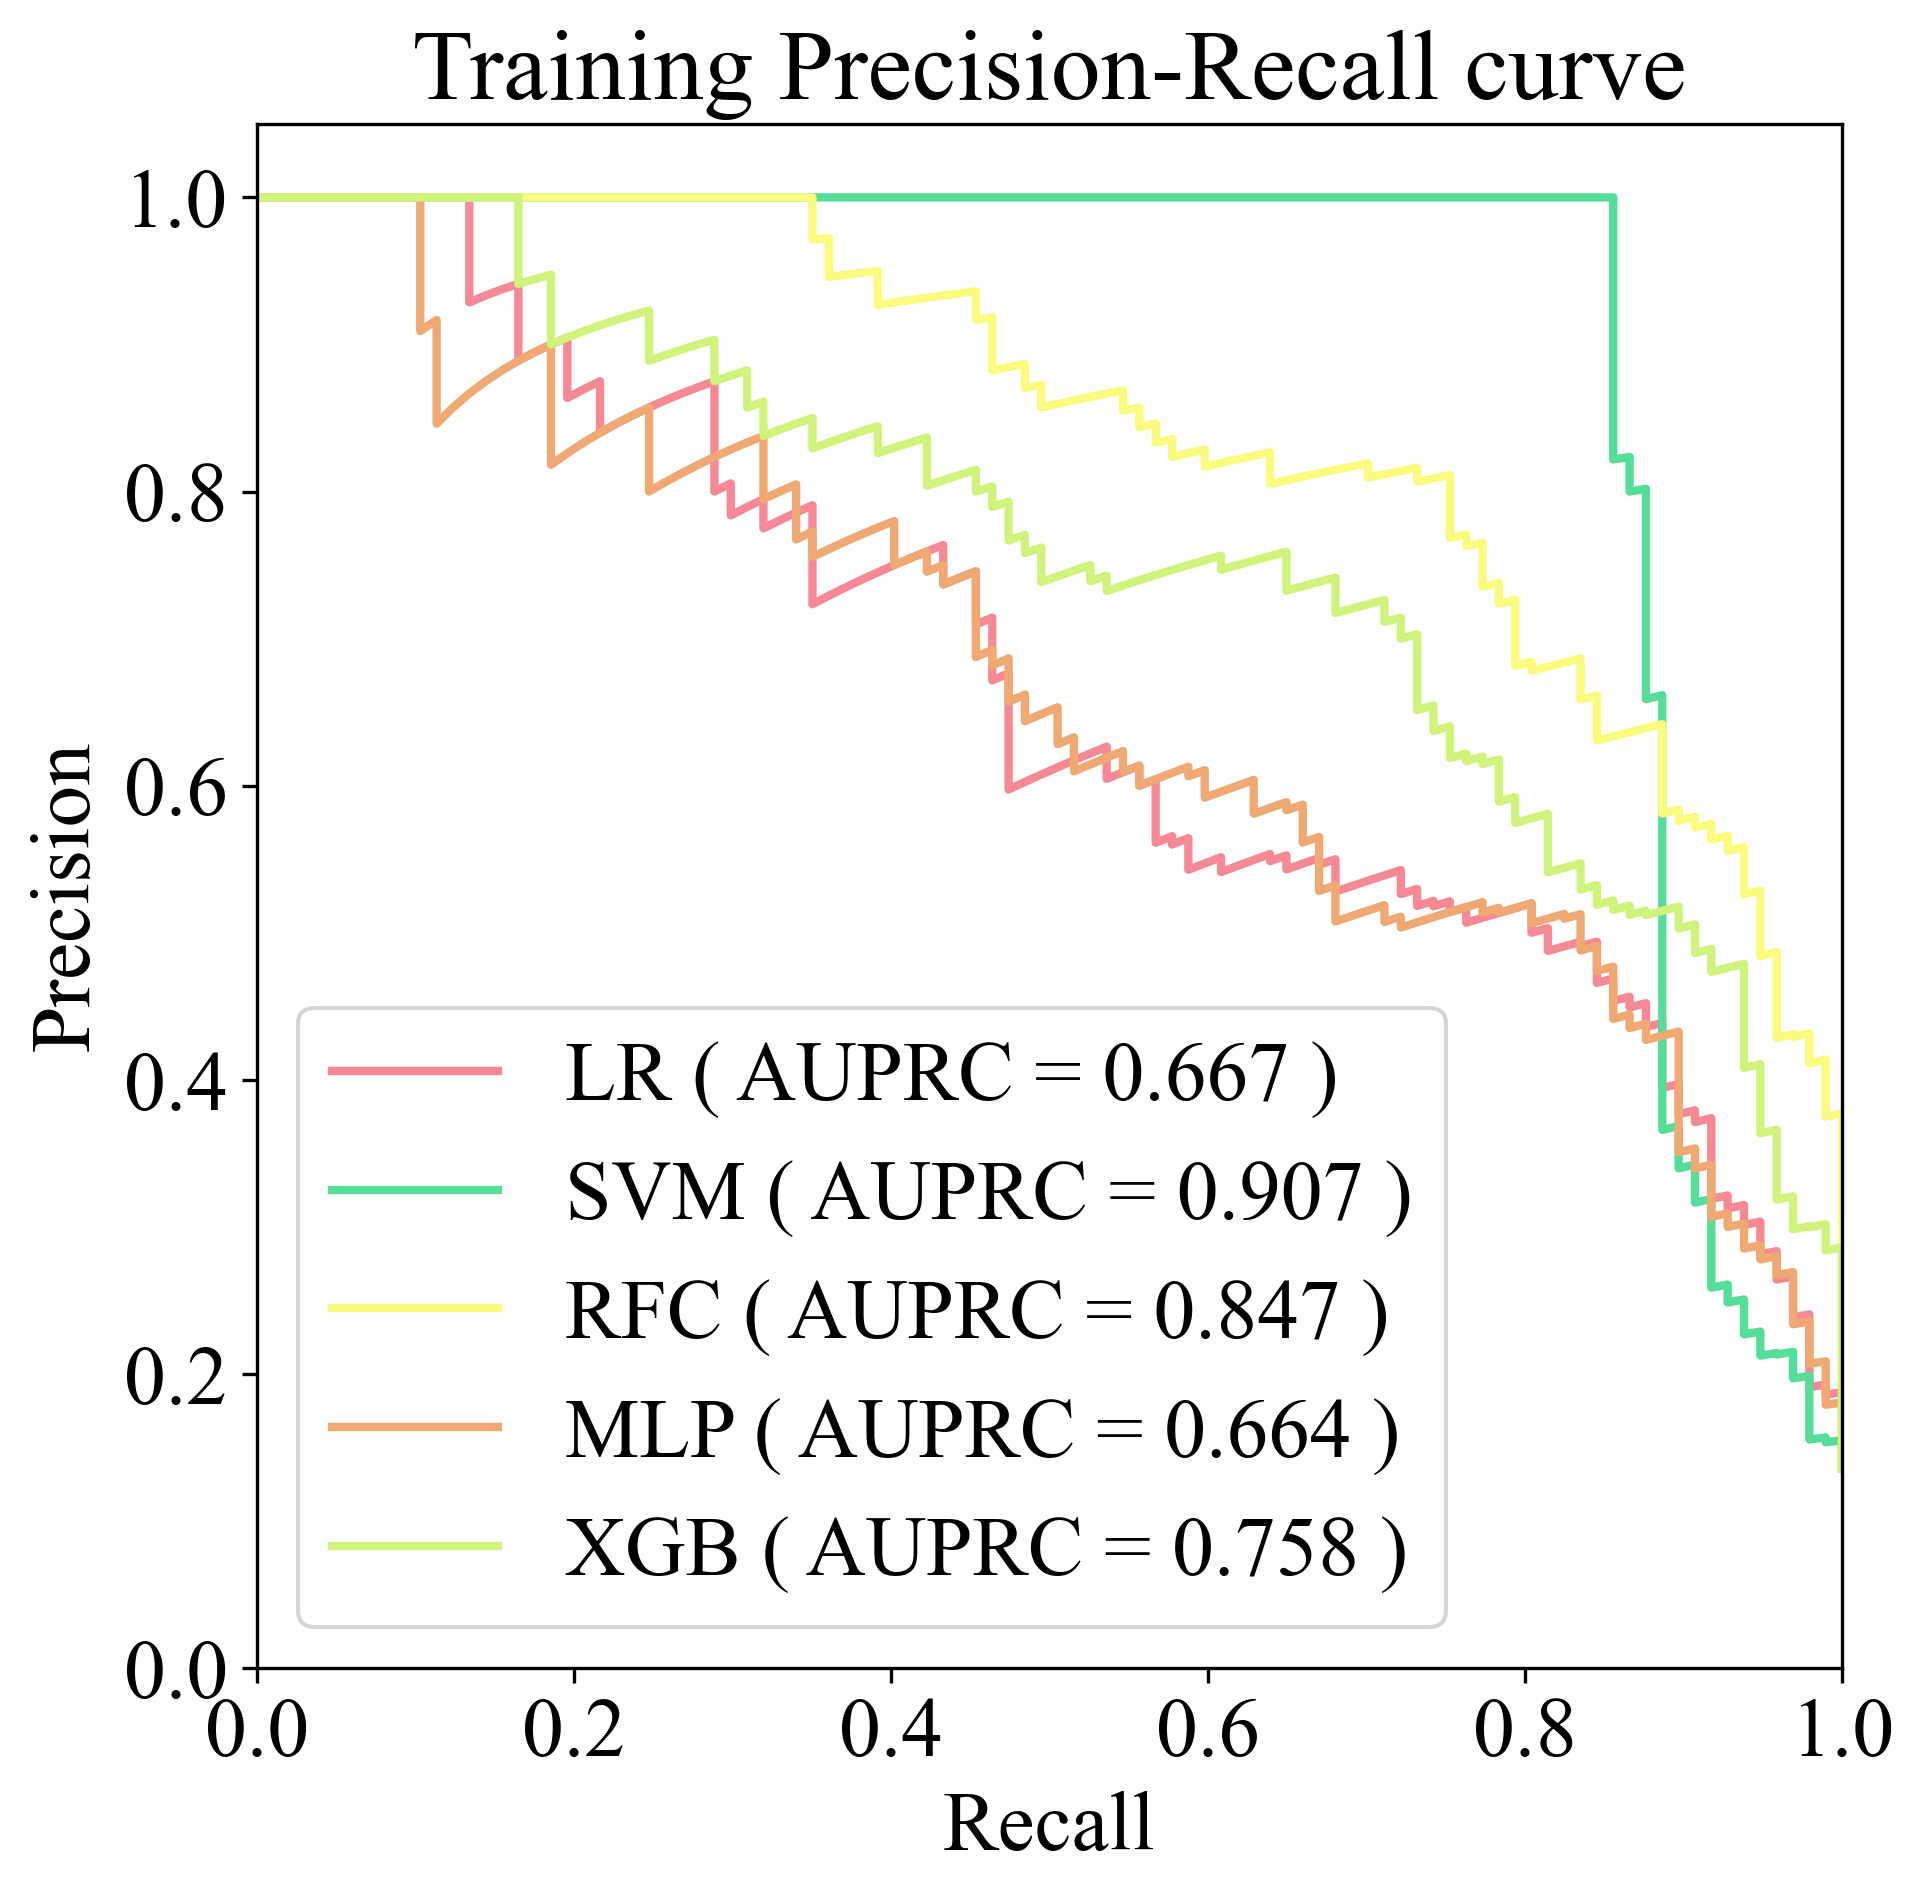

In [93]:
PRC1 = PlotPRC(ML_Name_List1)
PRC1.prc_set(title = "Training Precision-Recall curve")
PRC1.plot()

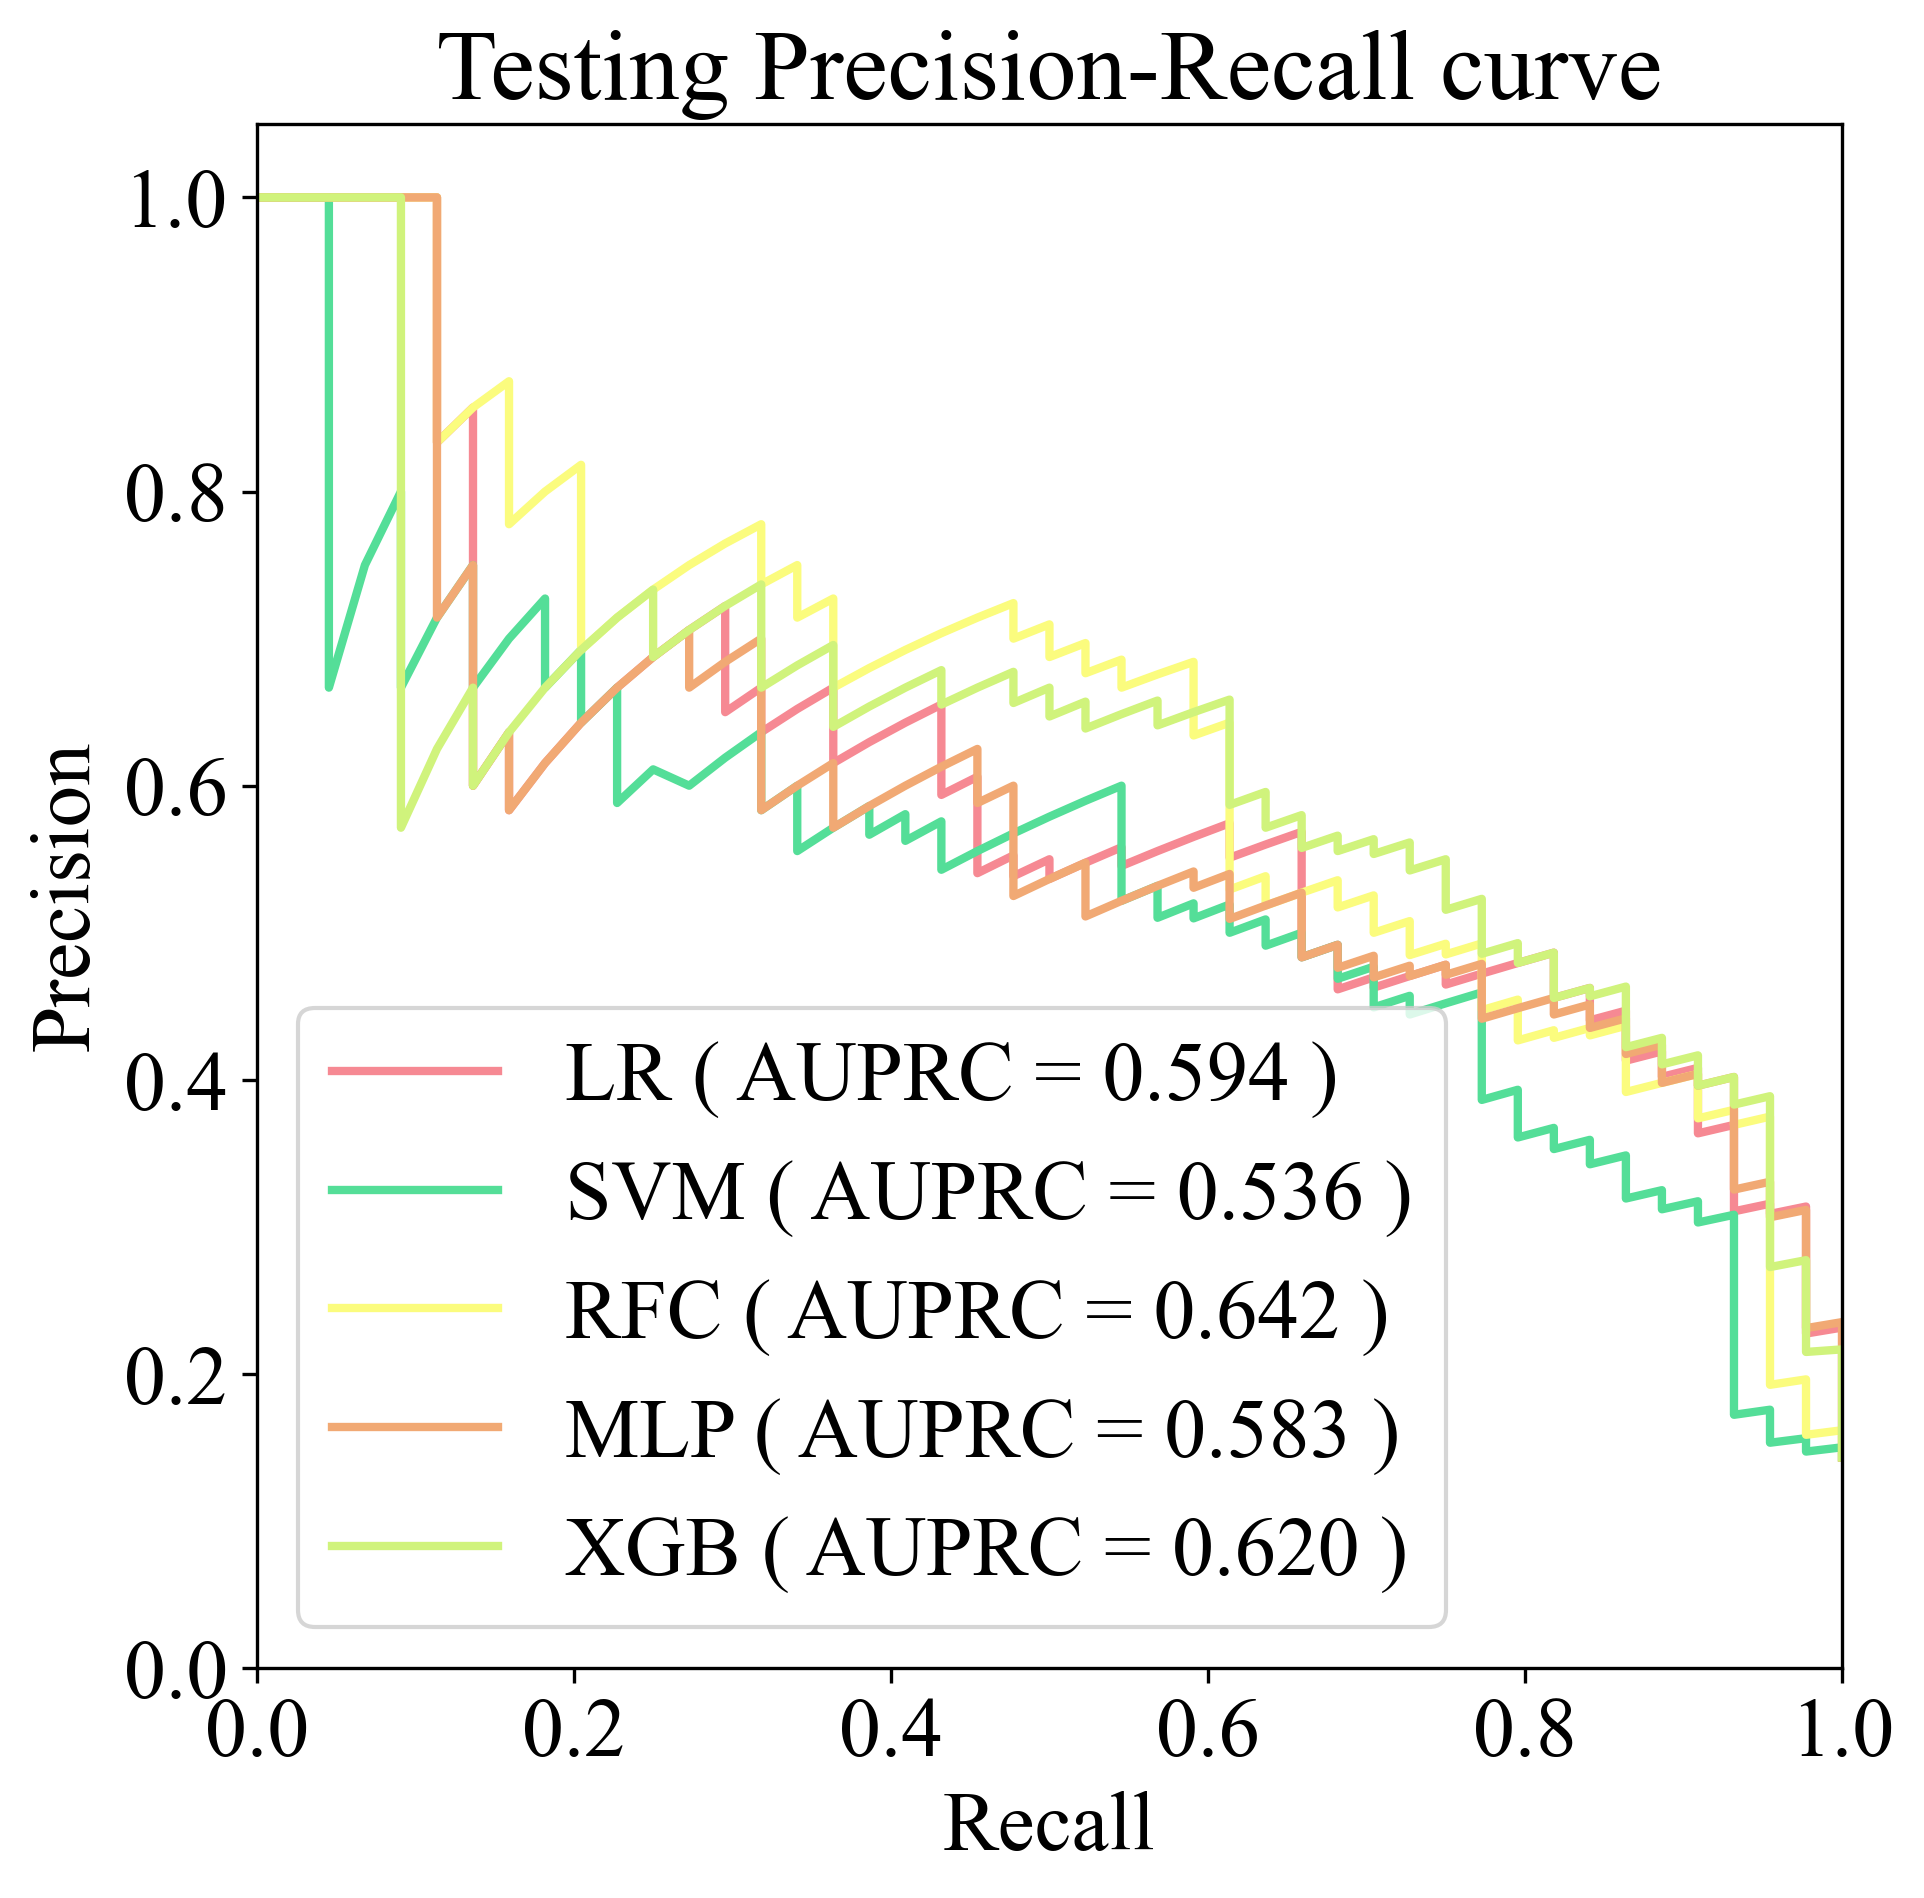

In [94]:
PRC2 = PlotPRC(ML_Name_List2)
PRC2.prc_set(title = "Testing Precision-Recall curve")
PRC2.plot()

In [95]:
class PlotROC:

    def __init__(self, CM_Name_List=None):
        
        #参数检查
        if type(CM_Name_List) == type(None):
            raise ValueError
        elif type(CM_Name_List) != type([]):
            raise ValueError
        else:
            self.__list = CM_Name_List
            
        #ROC曲线相关参数预设
        self.__title = "ROC Curve"
        self.__xlabel = "False Positive Rate"
        self.__ylabel = "True Positive Rate"
        self.__colorlist = ['#f68993', '#54de98', '#fbfc7e', '#f1a974', '#d0f37c', '#5579fe', '#e79dfa', '#8bf0f1']
        self.__colorswitch = False
        self.__systemcolor = False
        
        self.__plotstate = False
        
        return None
    
    def roc_set(self, title=None, xlabel=None, ylabel=None, colorlist=None):

        if type(title) != type(None):
            if type(title) == type("String"):
                self.__title = title
            else:
                raise ValueError
        
        if type(xlabel) != type(None):
            if type(xlabel) == type("String"):
                self.__xlabel = xlabel
            else:
                raise ValueError
        
        if type(ylabel) != type(None):
            if type(ylabel) == type("String"):
                self.__ylabel = ylabel
            else:
                raise ValueError
                
        if type(colorlist) != type(None):
            if type(colorlist) == type([]):
                if len(self.__list) > len(colorlist):
                    raise ValueError
                else:
                    self.__colorswitch = True
                    self.__colorlist = colorlist
            else:
                raise ValueError
        else:
            if len(self.__list) > 8:
                self.__systemcolor = True
        
        return None
    
    def plot(self):

        plt.close()
        plt.figure(figsize=(15,15), dpi=300, facecolor='w')
        plt.subplot(224)
        
        self.__colorindex = 0
        
        for self.__cm, self.__name in self.__list:
            self.__fpr, self.__tpr, self.__roc = self.__cm.roc()
            if self.__colorswitch:
                plt.plot(self.__fpr, self.__tpr, color=self.__colorlist[self.__colorindex], lw=2, 
                         label=self.__name + (' ( AUROC = %0.3f )' % self.__roc))
            else:
                if self.__systemcolor:
                    plt.plot(self.__fpr, self.__tpr, lw=2, label=self.__name + (' ( AUROC = %0.3f )' % self.__roc))                
                else:
                    plt.plot(self.__fpr, self.__tpr, color=self.__colorlist[self.__colorindex], lw=2, 
                             label=self.__name + (' ( AUROC = %0.3f )' % self.__roc))
            self.__colorindex = self.__colorindex + 1
        
        self.__colorindex = None
        
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel(self.__xlabel)
        plt.ylabel(self.__ylabel)
        plt.title(self.__title)
        plt.legend(loc="best")
        self.__ROCPlot = plt.gcf()
        plt.show()
        
        self.__plotstate = True
        
        return None
    
    def save(self, path="ROC.png", dpi=300):

        if self.__plotstate:
            self.__path = path
            self.__dpi = dpi
            
            self.__ROCPlot.savefig(self.__path, dpi=self.__dpi, bbox_inches = 'tight')
            print
        else:
            raise RuntimeError
        return None

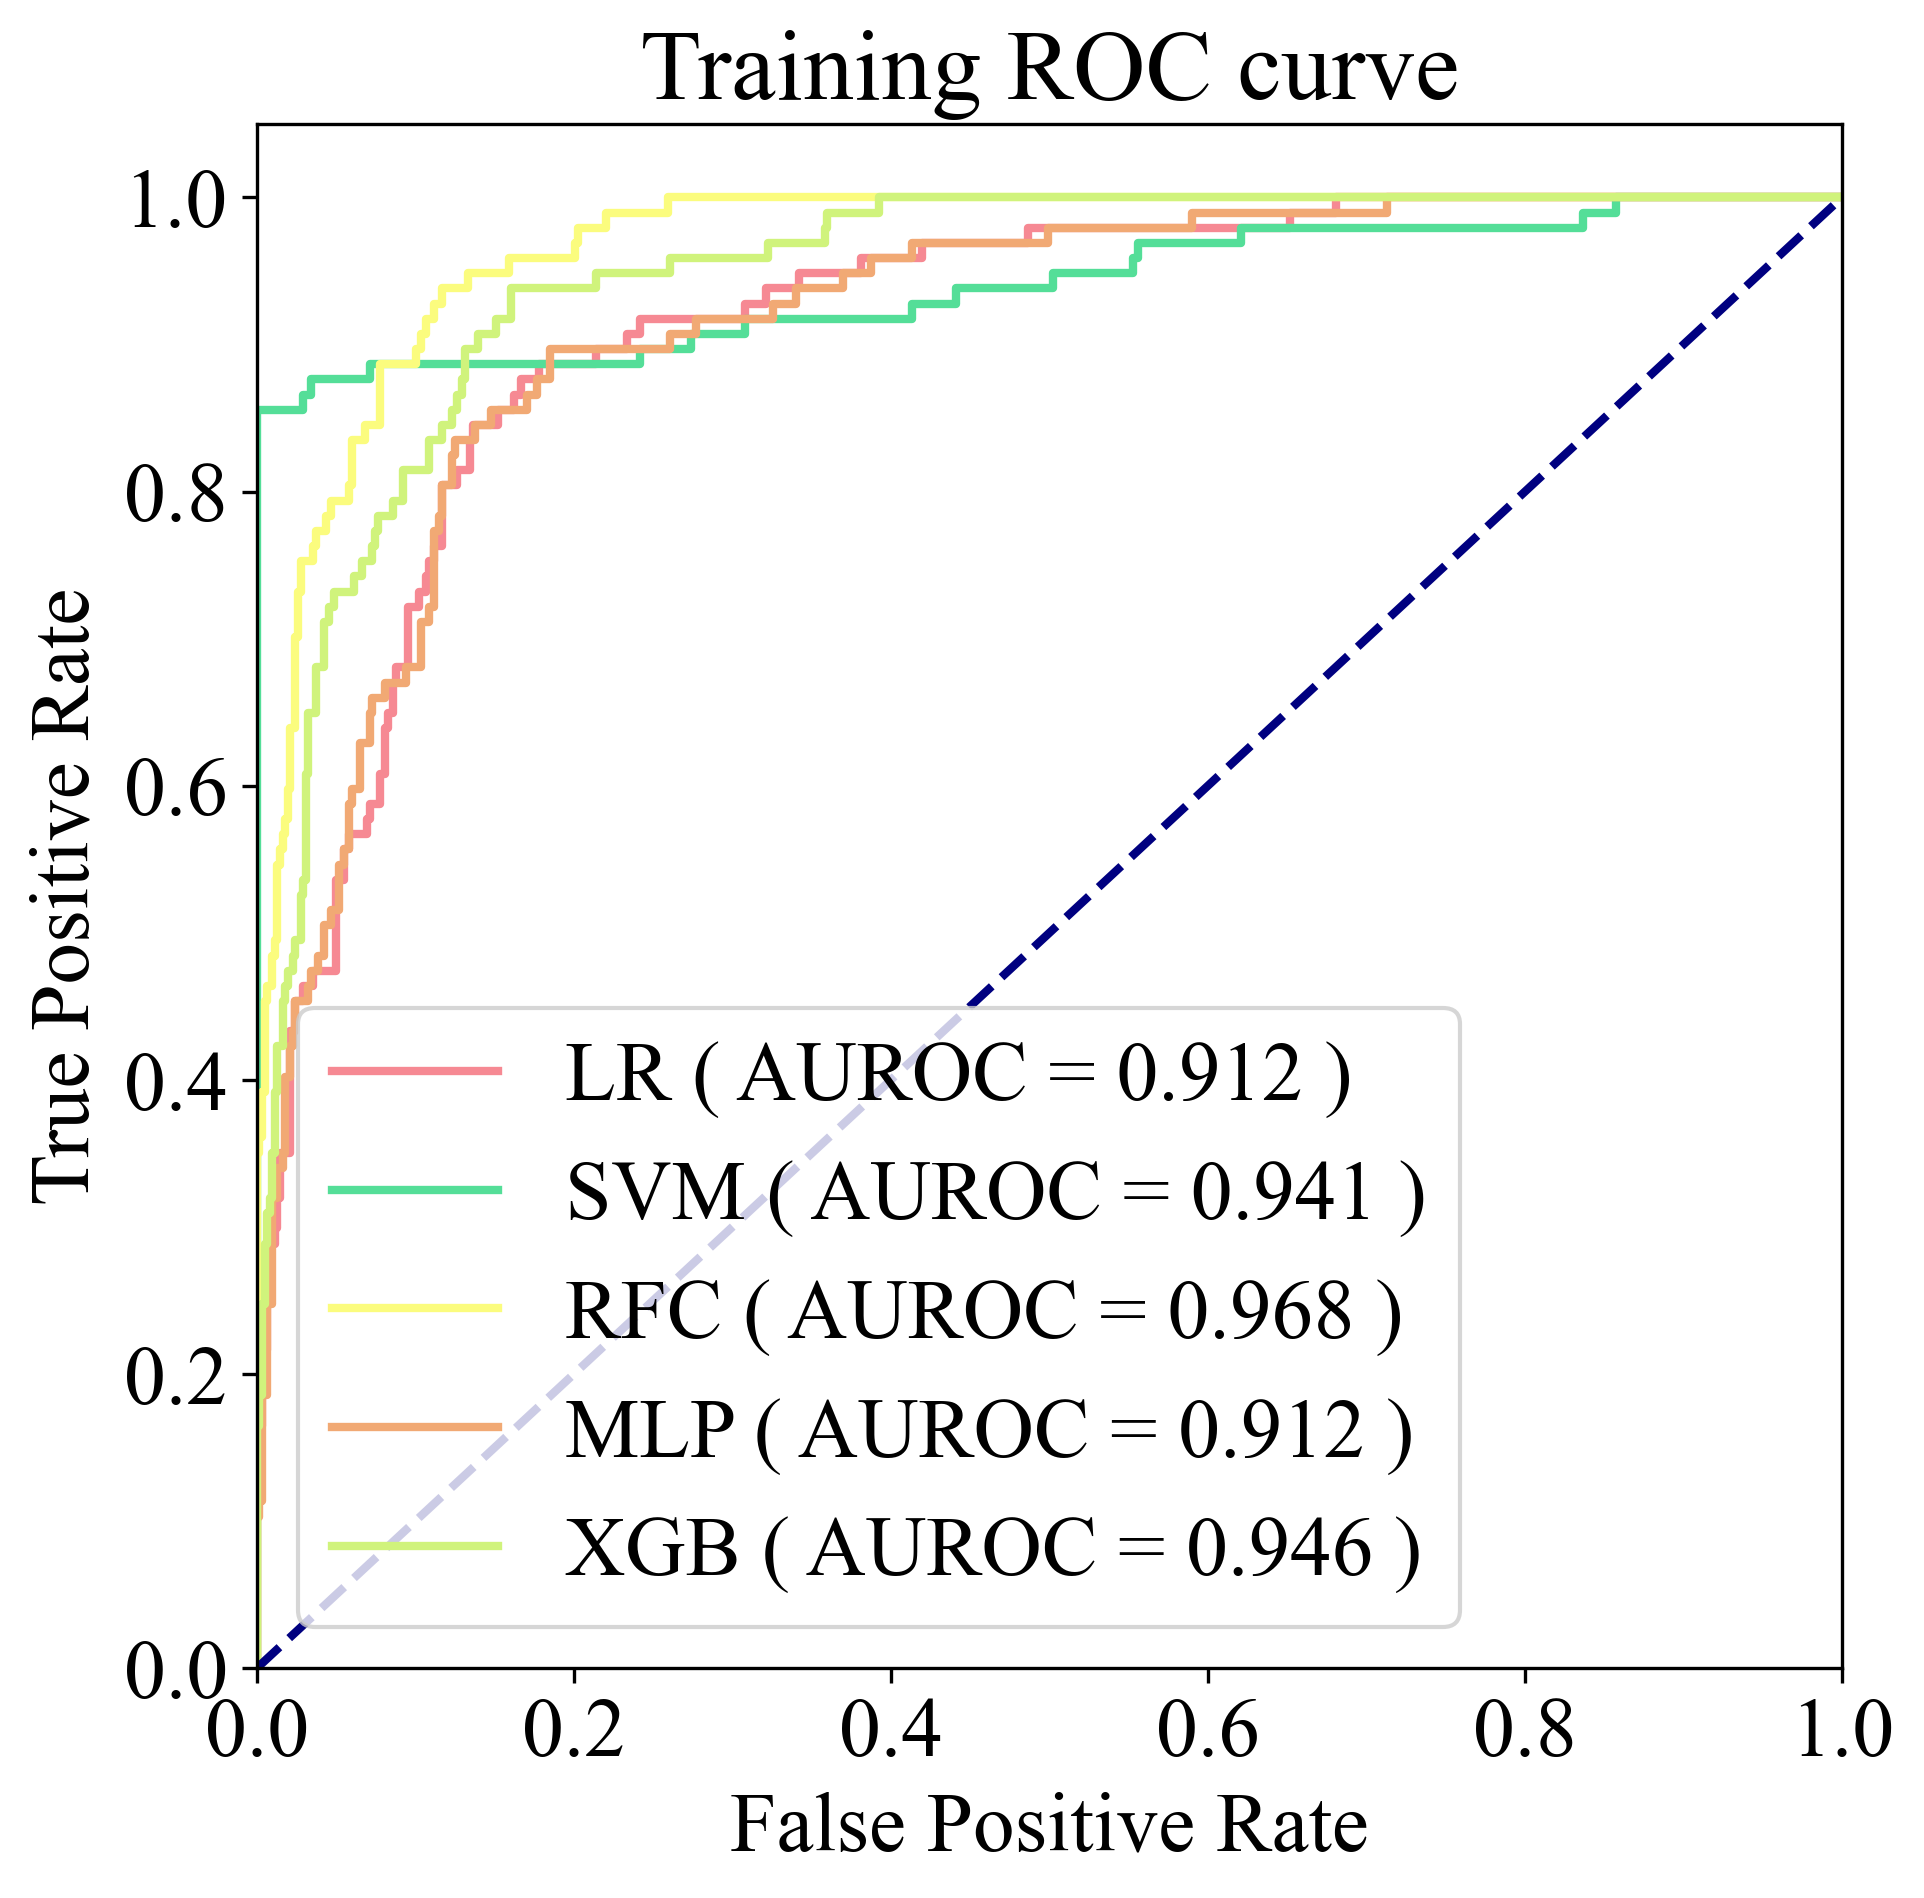

In [96]:
ROC1 = PlotROC(ML_Name_List1)
matplotlib.rcParams['font.family'] = 'Times New Roman'
ROC1.roc_set(title = "Training ROC curve")
ROC1.plot()


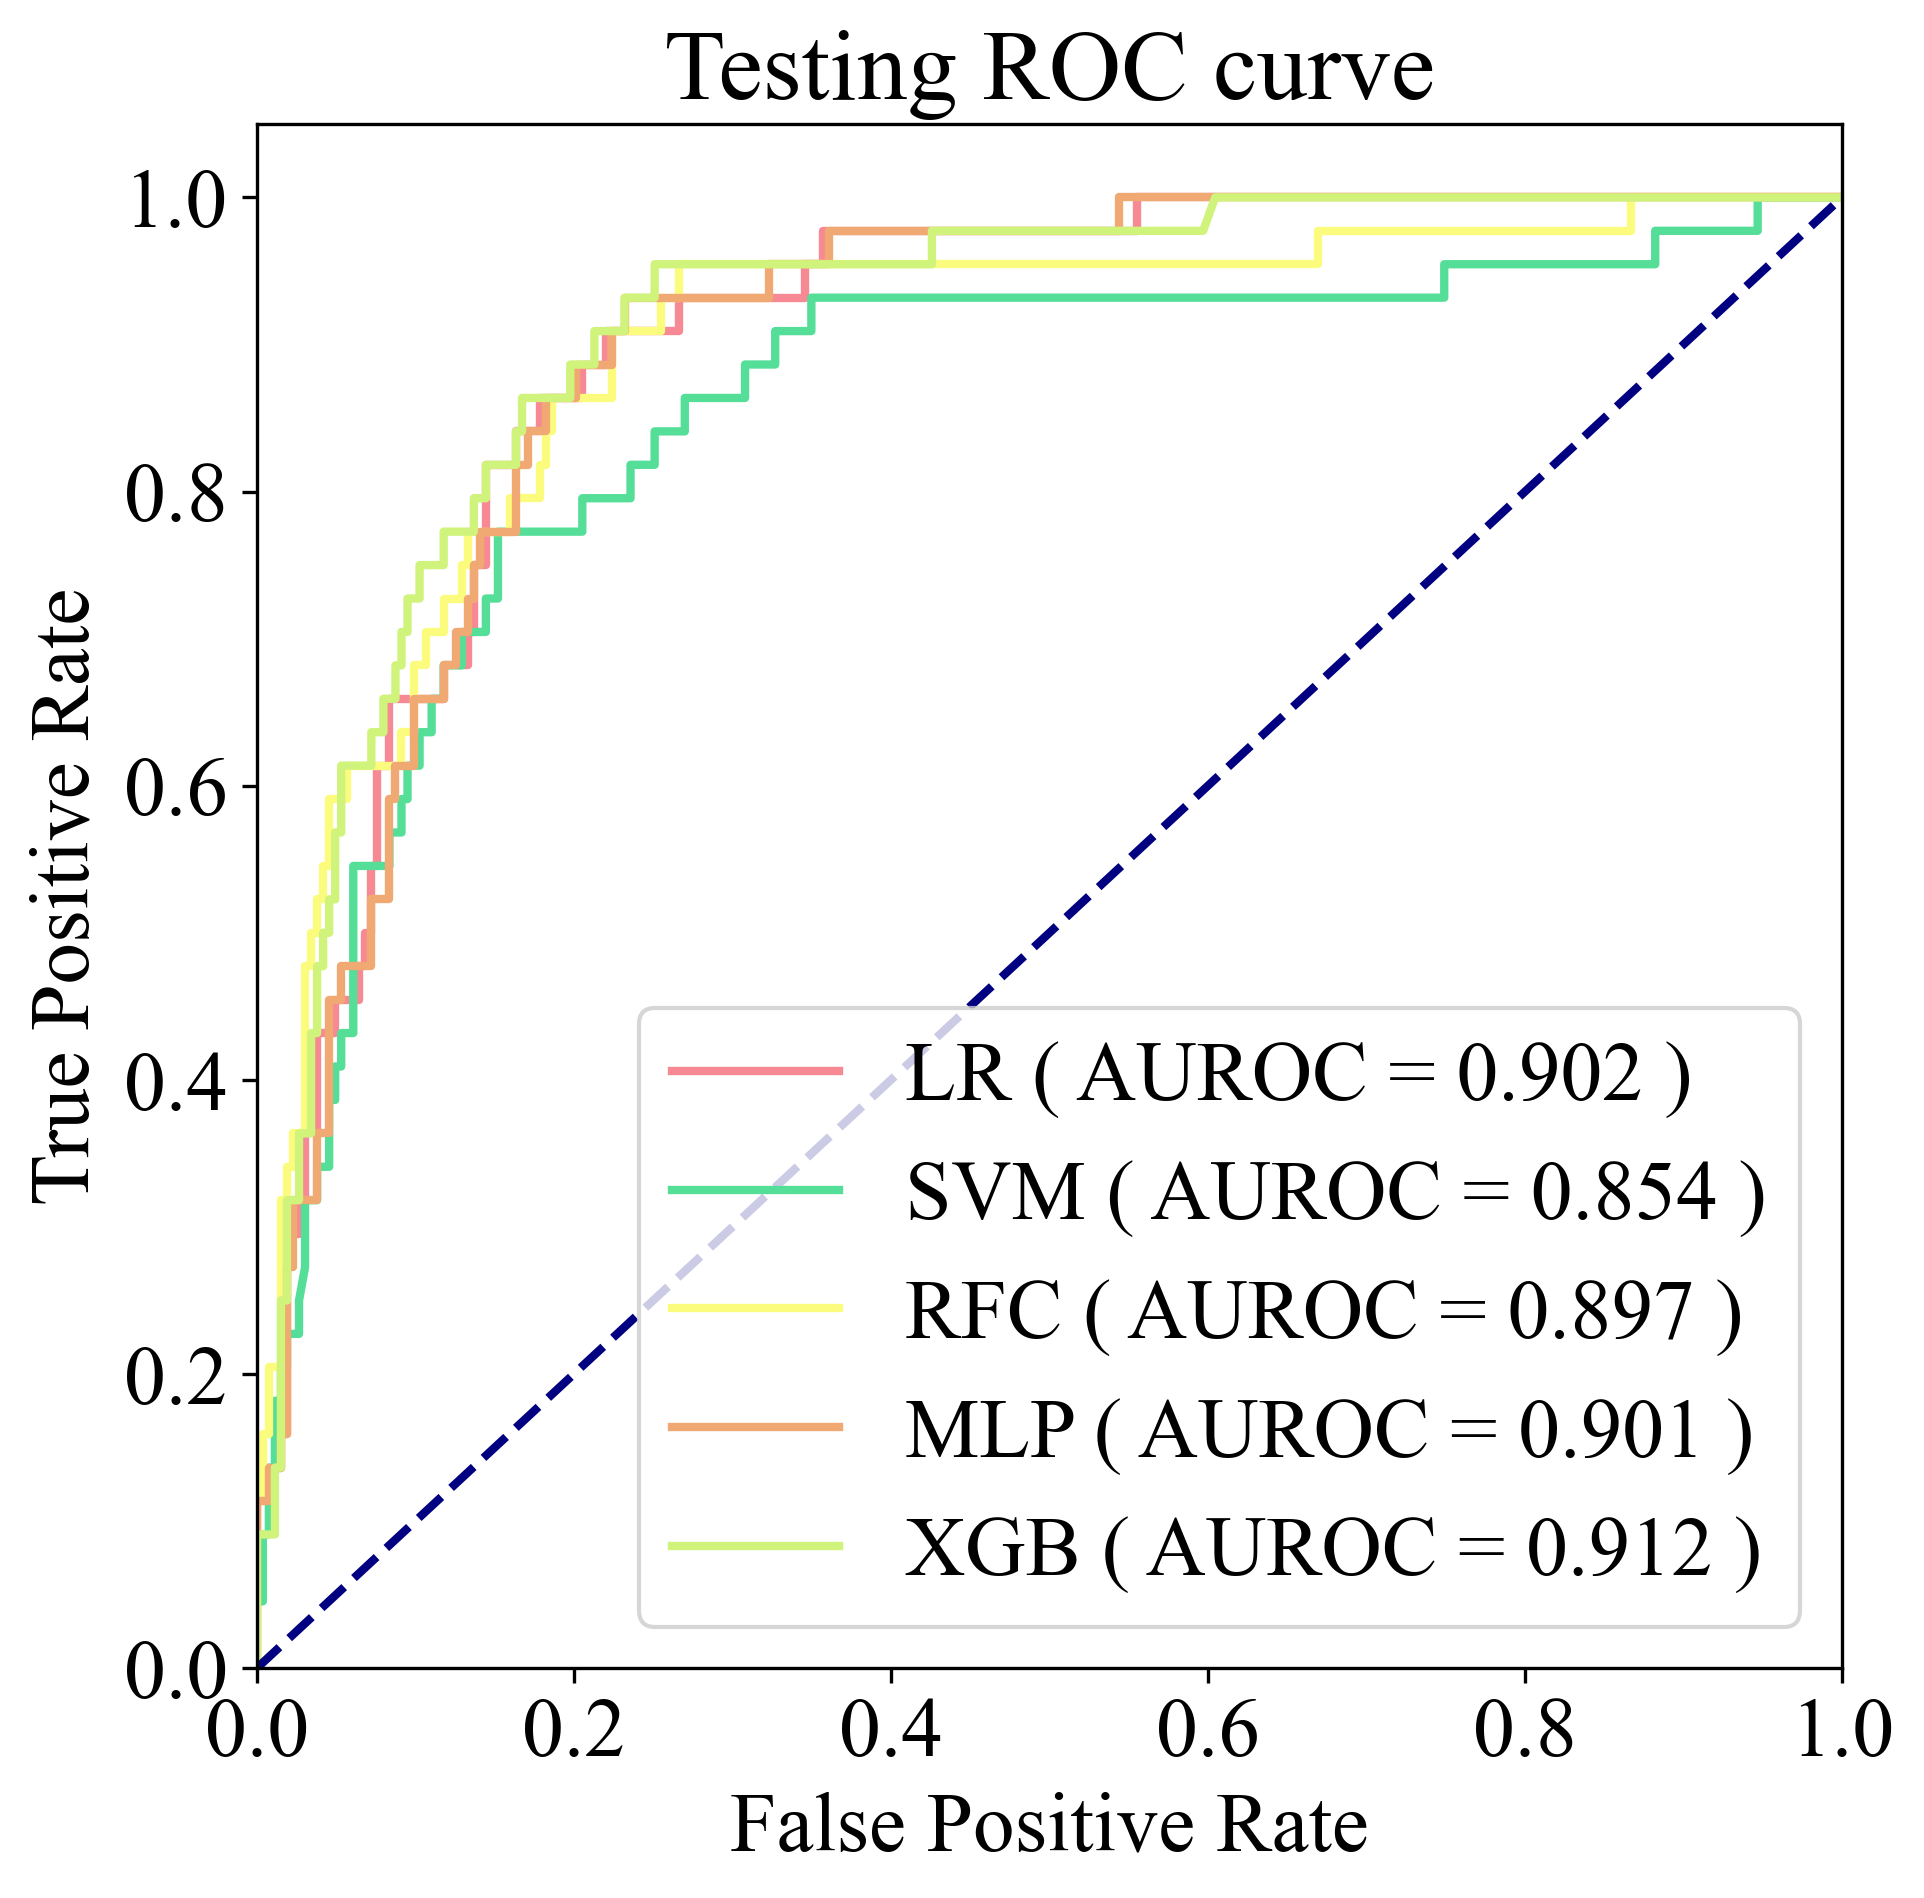

In [97]:
ROC2 = PlotROC(ML_Name_List2)
ROC2.roc_set(title = "Testing ROC curve")
ROC2.plot()

In [30]:
class PlotDCA:

    def __init__(self, Model_Name_List=None):
        if type(Model_Name_List) != type([]):
            self.__init_state = False
            raise ValueError("需要参数“Model_Name_List”，且类型为“list”")
        else:
            self.__init_state = True
            self.__plot_state = False
            self.__model_list = Model_Name_List
            
        return None

    def plot(self, x_data=None, y_data=None, color_list=None, x_max=0.5, y_max=0.2, xlabel='Threshold Probability', 
             ylabel='Net Benefit', title='Decision Curve Analysis of Models'):

        self.__plot_state = False
        
        if type(x_data) == type(None):
            raise ValueError("需要参数“x_data”")
        elif type(y_data) == type(None):
            raise ValueError("需要参数“y_data”")
        else:
            self.__x = x_data
            self.__y = y_data
            
        self.__x_max = x_max
        self.__y_max = y_max
        self.__xlabel = xlabel
        self.__ylabel = ylabel
        self.__title = title
        
        if type(color_list) == type(None):
            self.__defultcolor = True
            if len(self.__model_list) <= 8:
                self.__color_list = ['#f68993', '#54de98', '#f1a974', '#d0f37c', '#5579fe', '#e79dfa', '#8bf0f1', '#fbfc7e']
                self.__colorstate = False
            else:
                self.__colorstate = True
        else:
            if len(self.__model_list) > len(color_list):
                raise ValueError("颜色数量应大于等于模型数量，模型数量为%s，颜色的数量仅为%s" % (len(self.__model_list),len(color_list)))
            else:
                self.__defultcolor = False
                self.__color_list = color_list
        
        plt.close()
        plt.figure(figsize=(6.4, 4.8), dpi=300)
        
        self.__cycle = 0
        self.__detailed_value = {}
        self.__pt_list = []
        self.__jd_list = []
        self.__index = []
        for i in range(0,100,1):
            self.__pt_value = i/100
            self.__jd_value = (np.sum(self.__y)-(len(self.__y)-np.sum(self.__y))*self.__pt_value/(1-self.__pt_value))/len(self.__y)
            self.__pt_list.append(self.__pt_value)
            self.__jd_list.append(self.__jd_value)
        
        for self.__model, self.__name in self.__model_list:
            if self.__name == 'DNN':
                self.__proba_model = self.__model.predict(self.__x)
                self.__y_proba = np.copy(self.__proba_model)
            else:
                self.__proba_model = self.__model.predict_proba(self.__x)
                self.__y_proba = np.copy(self.__proba_model[:, 1])
            
            self.__TP_list = []
            self.__FP_list = []
            self.__NB_list = []
            self.__Y = self.__y
            self.__index.append(self.__name)
            
            self.__y_proba = self.__y_proba.ravel()
            
            for m in range(0,100,1):
                self.__pt = m/100
                self.__y_pred = np.zeros(self.__y_proba.shape[0])
                for n in range(self.__y_proba.shape[0]):
                    if self.__y_proba[n] >= self.__pt:
                        self.__y_pred[n] = 1
                    else:
                        self.__y_pred[n] = 0
                        
                MC = confusion_matrix(self.__Y,self.__y_pred)
                self.__TP = MC[1,1]
                self.__FP = MC[0,1]
                self.__NB = (self.__TP-(self.__FP * self.__pt/(1-self.__pt)) )/self.__Y.shape[0]
                
                self.__TP_list.append(self.__TP)
                self.__FP_list.append(self.__FP)
                self.__NB_list.append(self.__NB)
                
            #模型的净收益
            if self.__defultcolor:
                if self.__colorstate:
                    plt.plot(self.__pt_list, self.__NB_list, lw=1, linestyle='-',label=self.__name)
                else:
                    plt.plot(self.__pt_list, self.__NB_list, color=self.__color_list[self.__cycle], lw=1, linestyle='-',label=self.__name)
            else:
                plt.plot(self.__pt_list, self.__NB_list, color=self.__color_list[self.__cycle], lw=1, linestyle='-',label=self.__name)
            
            self.__dictionary = {'阈值（pt）':self.__pt_list, 'TP':self.__TP_list, 'FP':self.__FP_list, 'Net Benefit(NB)':self.__NB_list}
            self.__dataframe = pd.DataFrame(self.__dictionary)
            self.__detailed_value.update({self.__name: self.__dataframe})
            self.__cycle = self.__cycle + 1
            
        #所有人都不治疗的净收益
        plt.plot(self.__pt_list, np.zeros(len(self.__pt_list)), color='#383c3b', lw=1, linestyle='--',label='None')
        #所有人都治疗的净收益
        plt.plot(self.__pt_list, self.__jd_list, color='#21336e', lw=1, linestyle='dotted',label='All')
        
        
        plt.xlim([0.0, self.__x_max])
        plt.ylim([-0.05, self.__y_max])
        plt.xlabel(self.__xlabel)
        plt.ylabel(self.__ylabel)
        plt.title(self.__title)
        plt.legend(loc="best")
        self.__fig = plt.gcf()
        plt.show()
        
        self.__plot_state = True
        
        return None


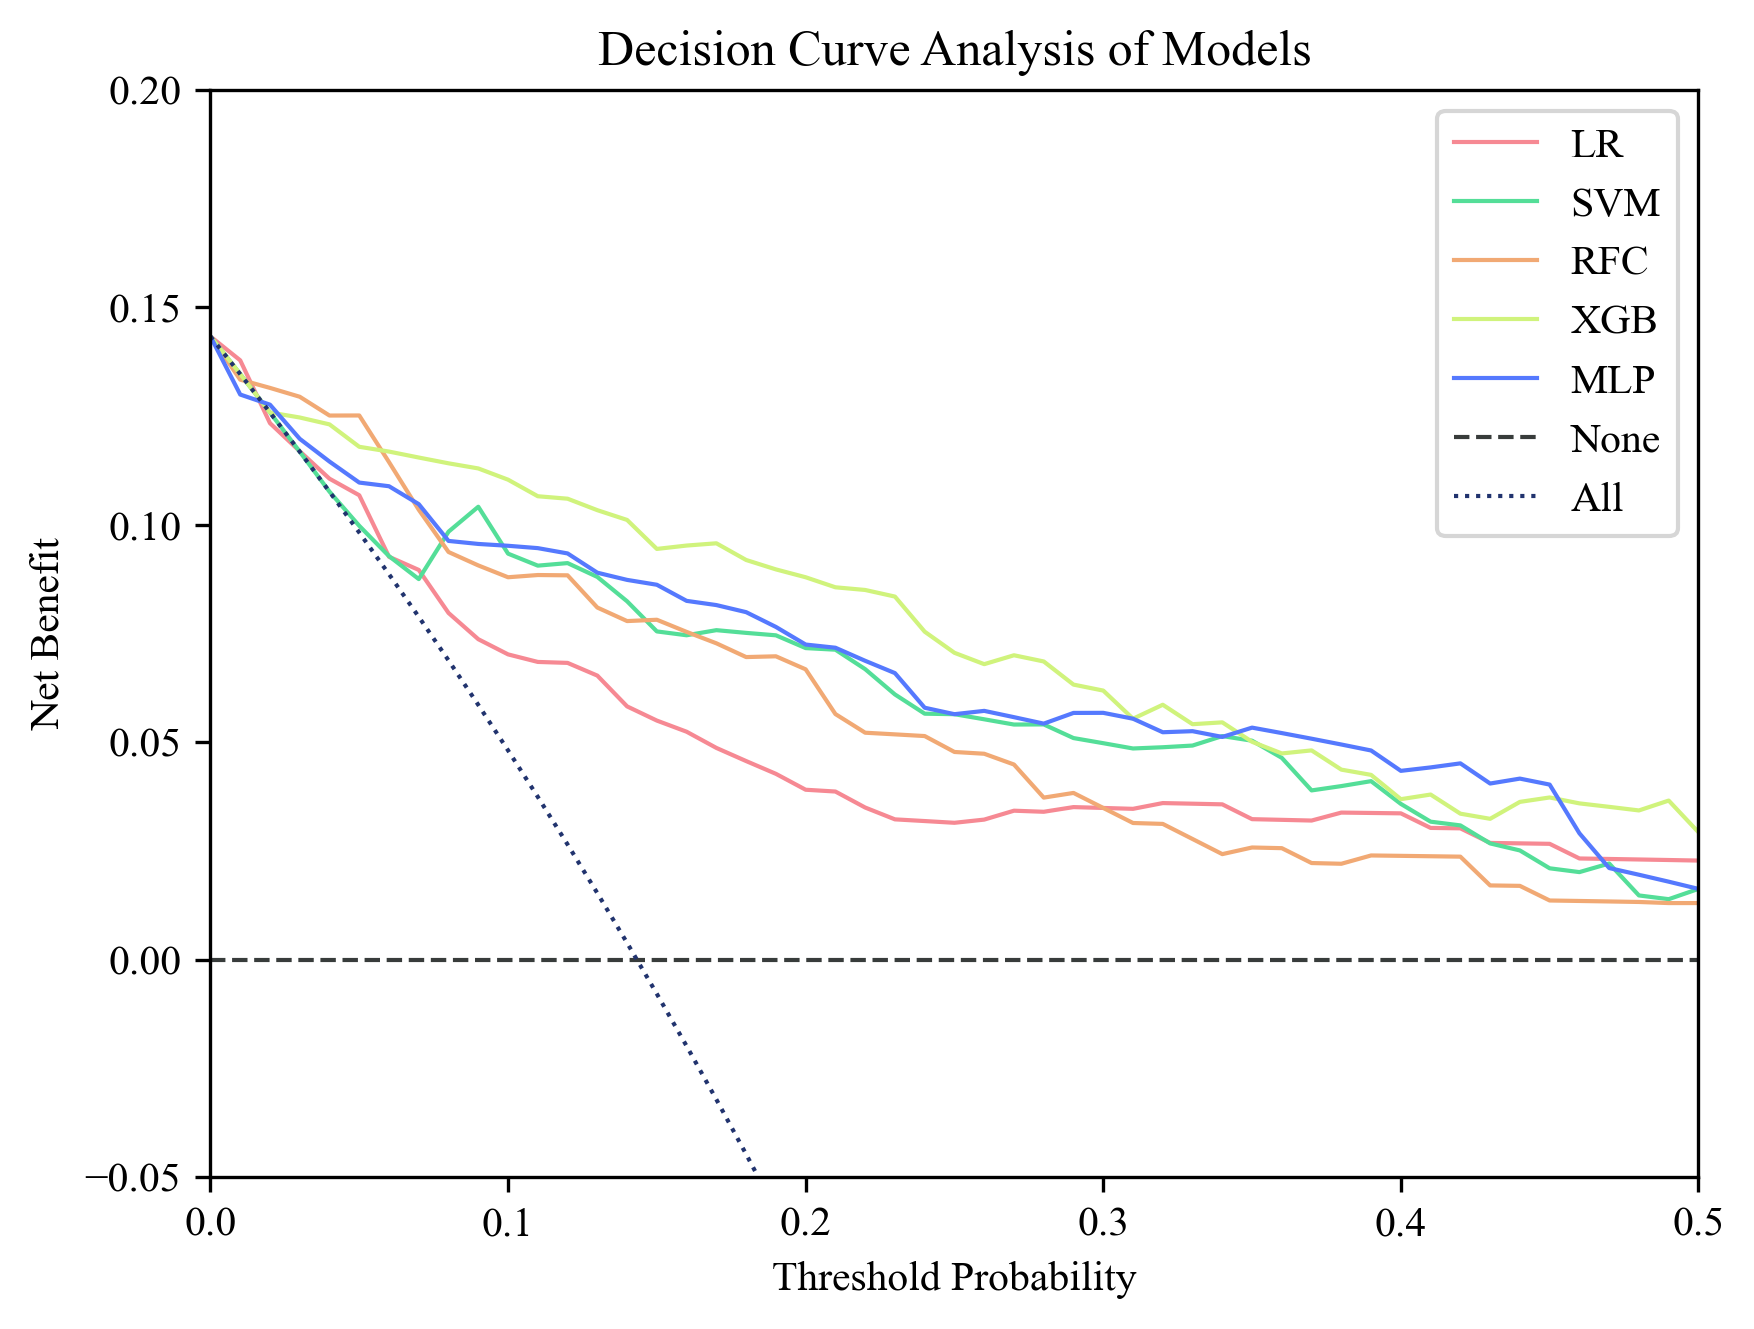

In [31]:
Model_Name_List = [(lr, 'LR'),(svm, 'SVM'),(rfc, 'RFC'),(xgb, 'XGB'),(mlp, 'MLP')]
DCA = PlotDCA(Model_Name_List)
DCA.plot(testx,testy)

LR:
	Brier: 0.099 slope:1.175 intercept:0.084
RFC:
	Brier: 0.095 slope:1.549 intercept:0.101
SVM:
	Brier: 0.092 slope:0.935 intercept:0.064
XGB:
	Brier: 0.078 slope:0.888 intercept:0.061
MLP:
	Brier: 0.091 slope:0.533 intercept:0.120


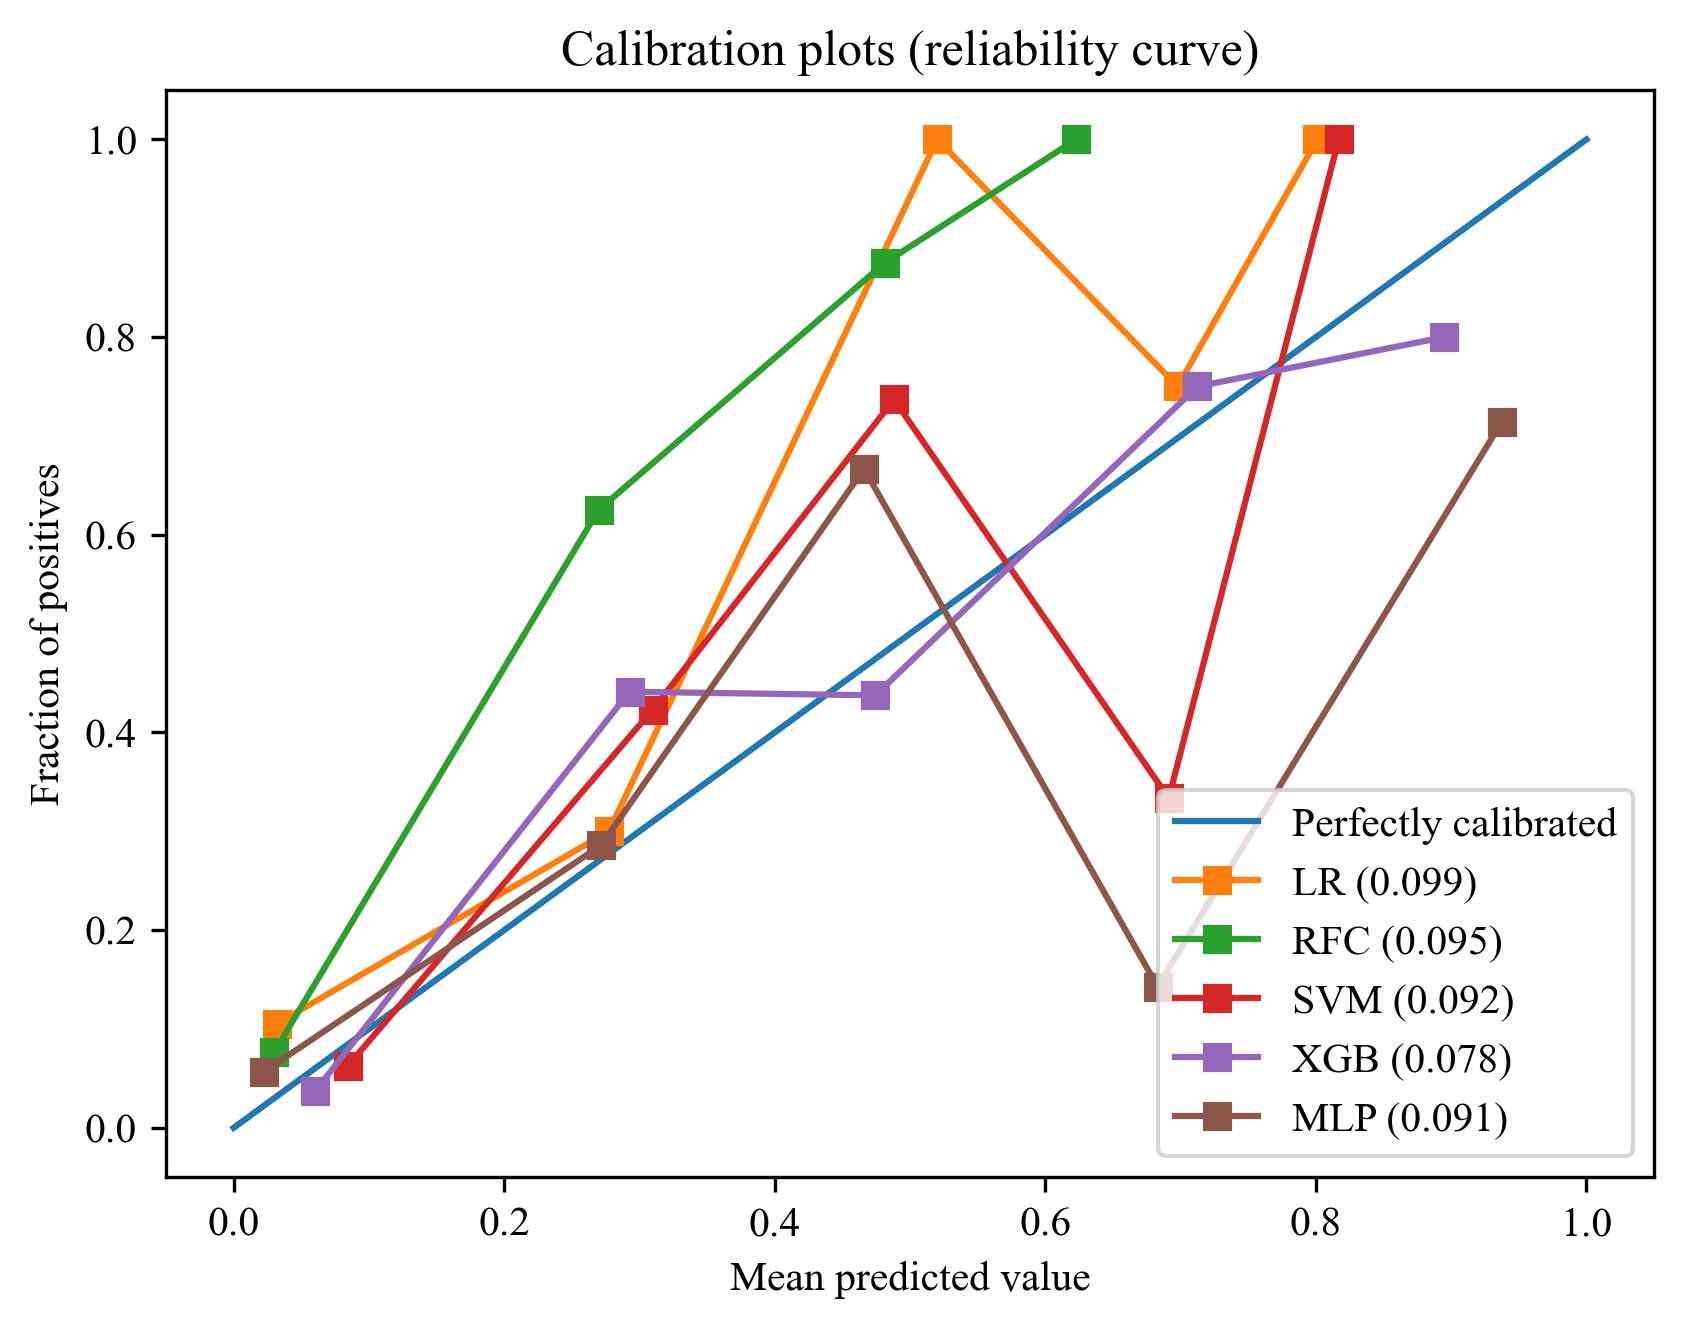

In [32]:
from sklearn.datasets import make_classification as mc
from sklearn.metrics import brier_score_loss 
from sklearn.calibration import calibration_curve 
from sklearn.linear_model import LinearRegression

name = ["LR","RFC","SVM",'XGB','MLP']
#fraction_of_positives trueproba, mean_predicted_value predproba.
plt.figure(figsize=(6.4,4.8),dpi=300)
plt.plot([0,1],[0,1],label = "Perfectly calibrated") 
for clf,name_ in zip([lr,rfc,svm,xgb,mlp],name):
    
    
    if name_ == 'DNN':        
        proba_pos = clf.predict(testx)
    else:                
        proba_pos = clf.predict_proba(testx)[:, 1]
    
    clf_score = brier_score_loss(testy, proba_pos)
    fraction_of_positives, mean_predicted_value = calibration_curve(testy, proba_pos, n_bins=5)
    model= LinearRegression()
    model.fit(mean_predicted_value.reshape(-1,1),fraction_of_positives.reshape(-1,1))
    print("%s:" % name_)
    print("\tBrier: %1.3f" % (clf_score),'slope:%1.3f'%model.coef_ ,'intercept:%1.3f'%model.intercept_)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s (%1.3f)" % (name_, clf_score))

plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots (reliability curve)')

plt.show()


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/714 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

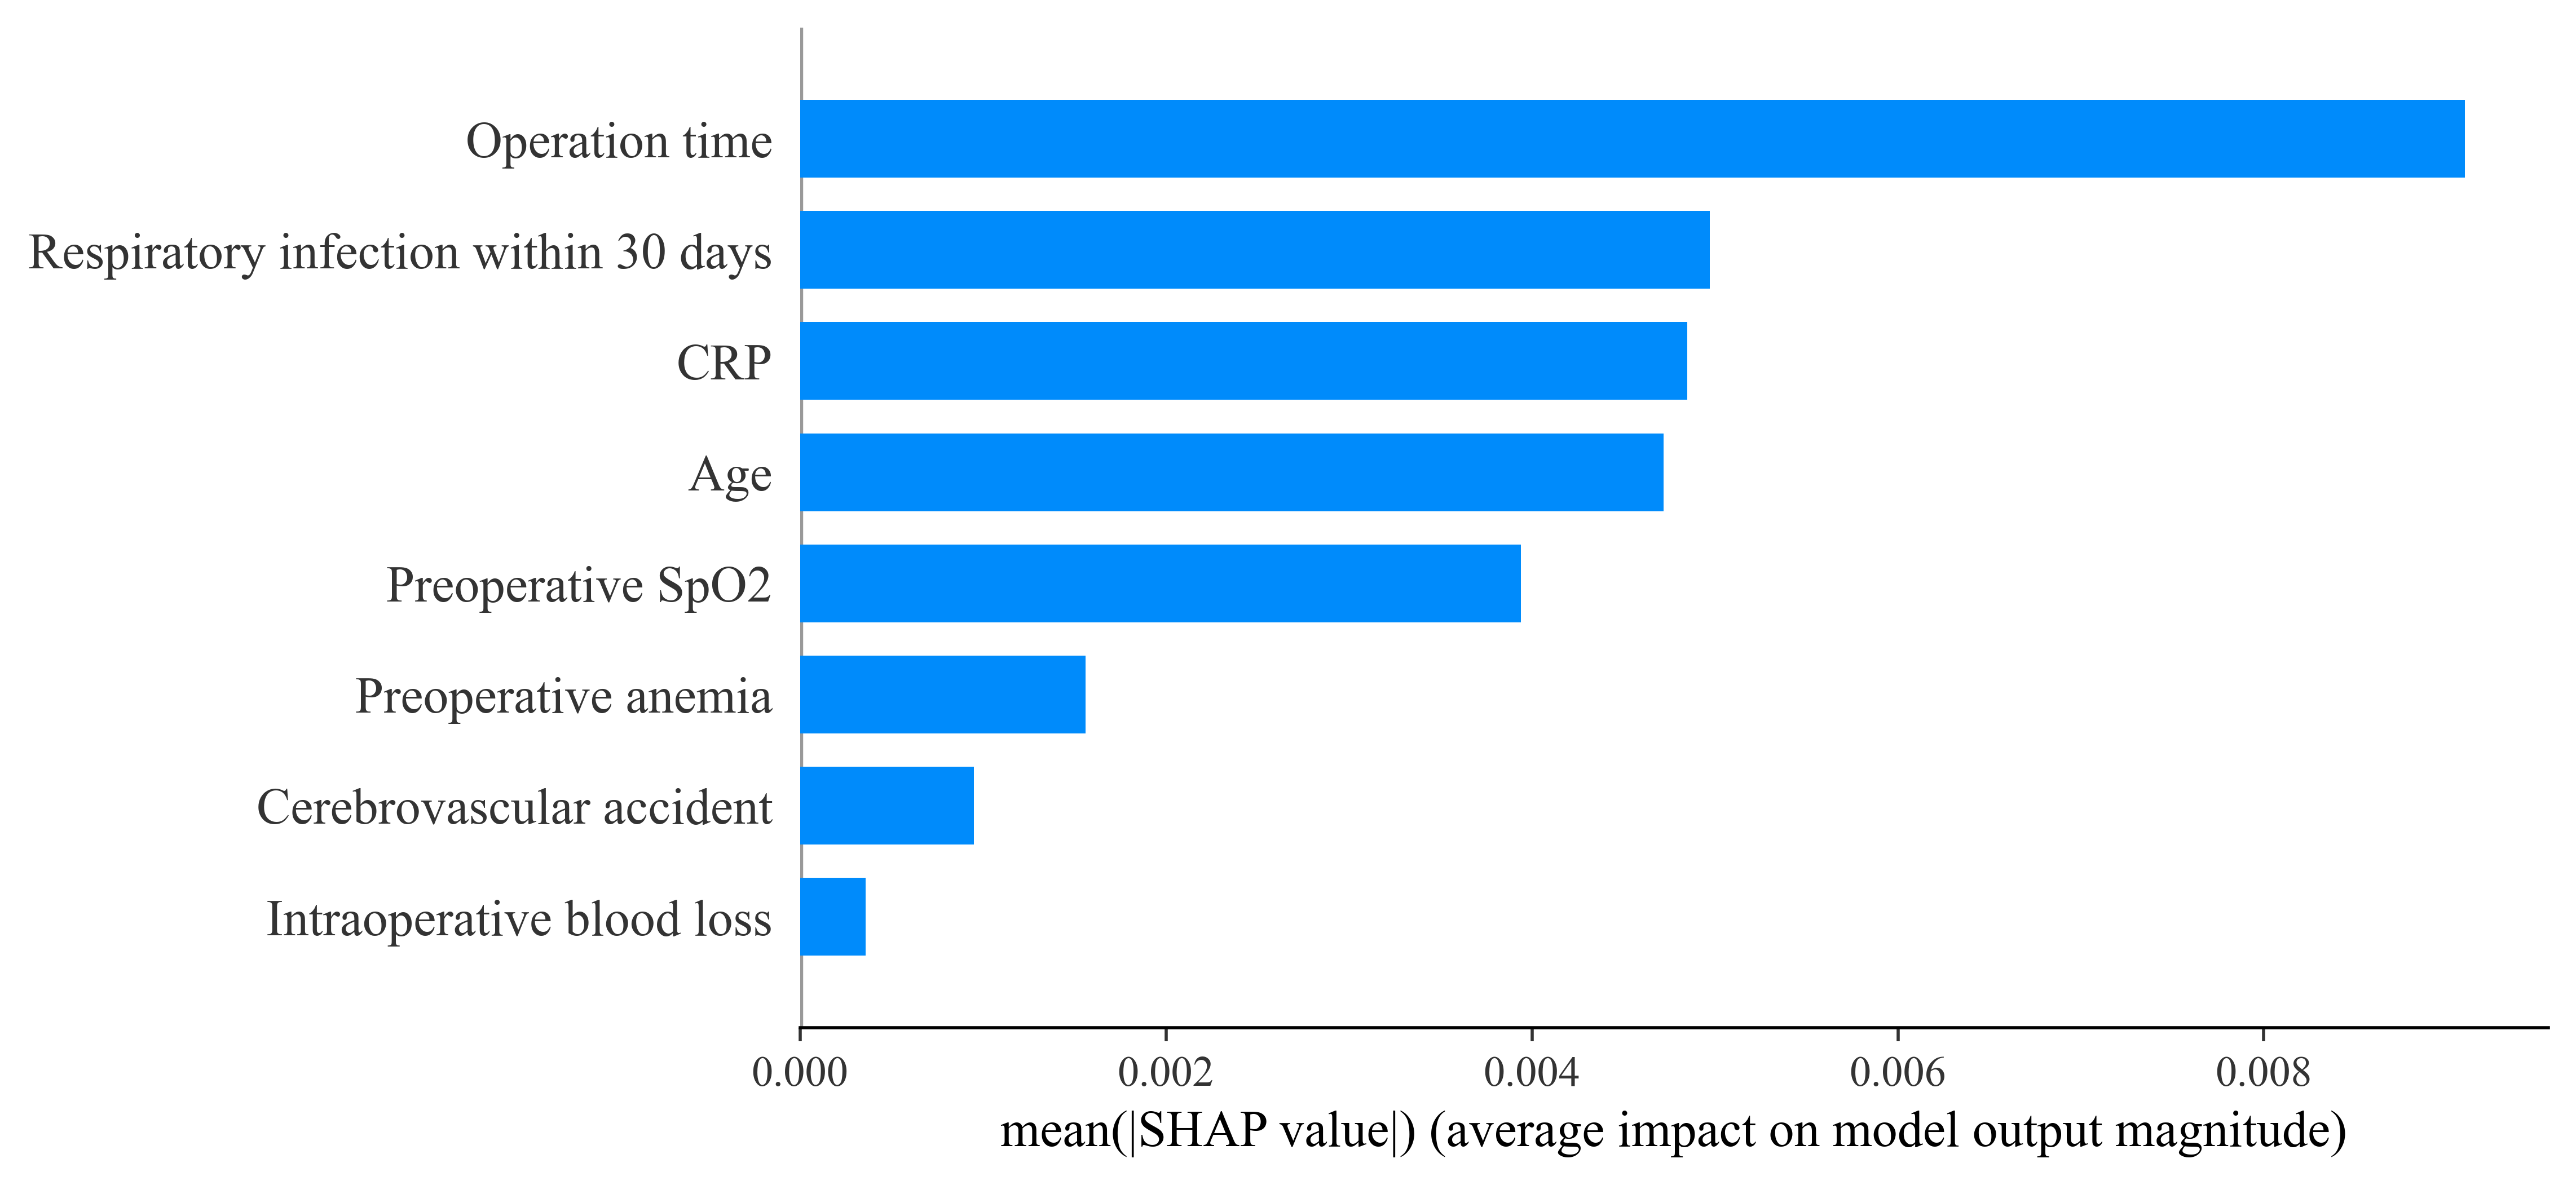

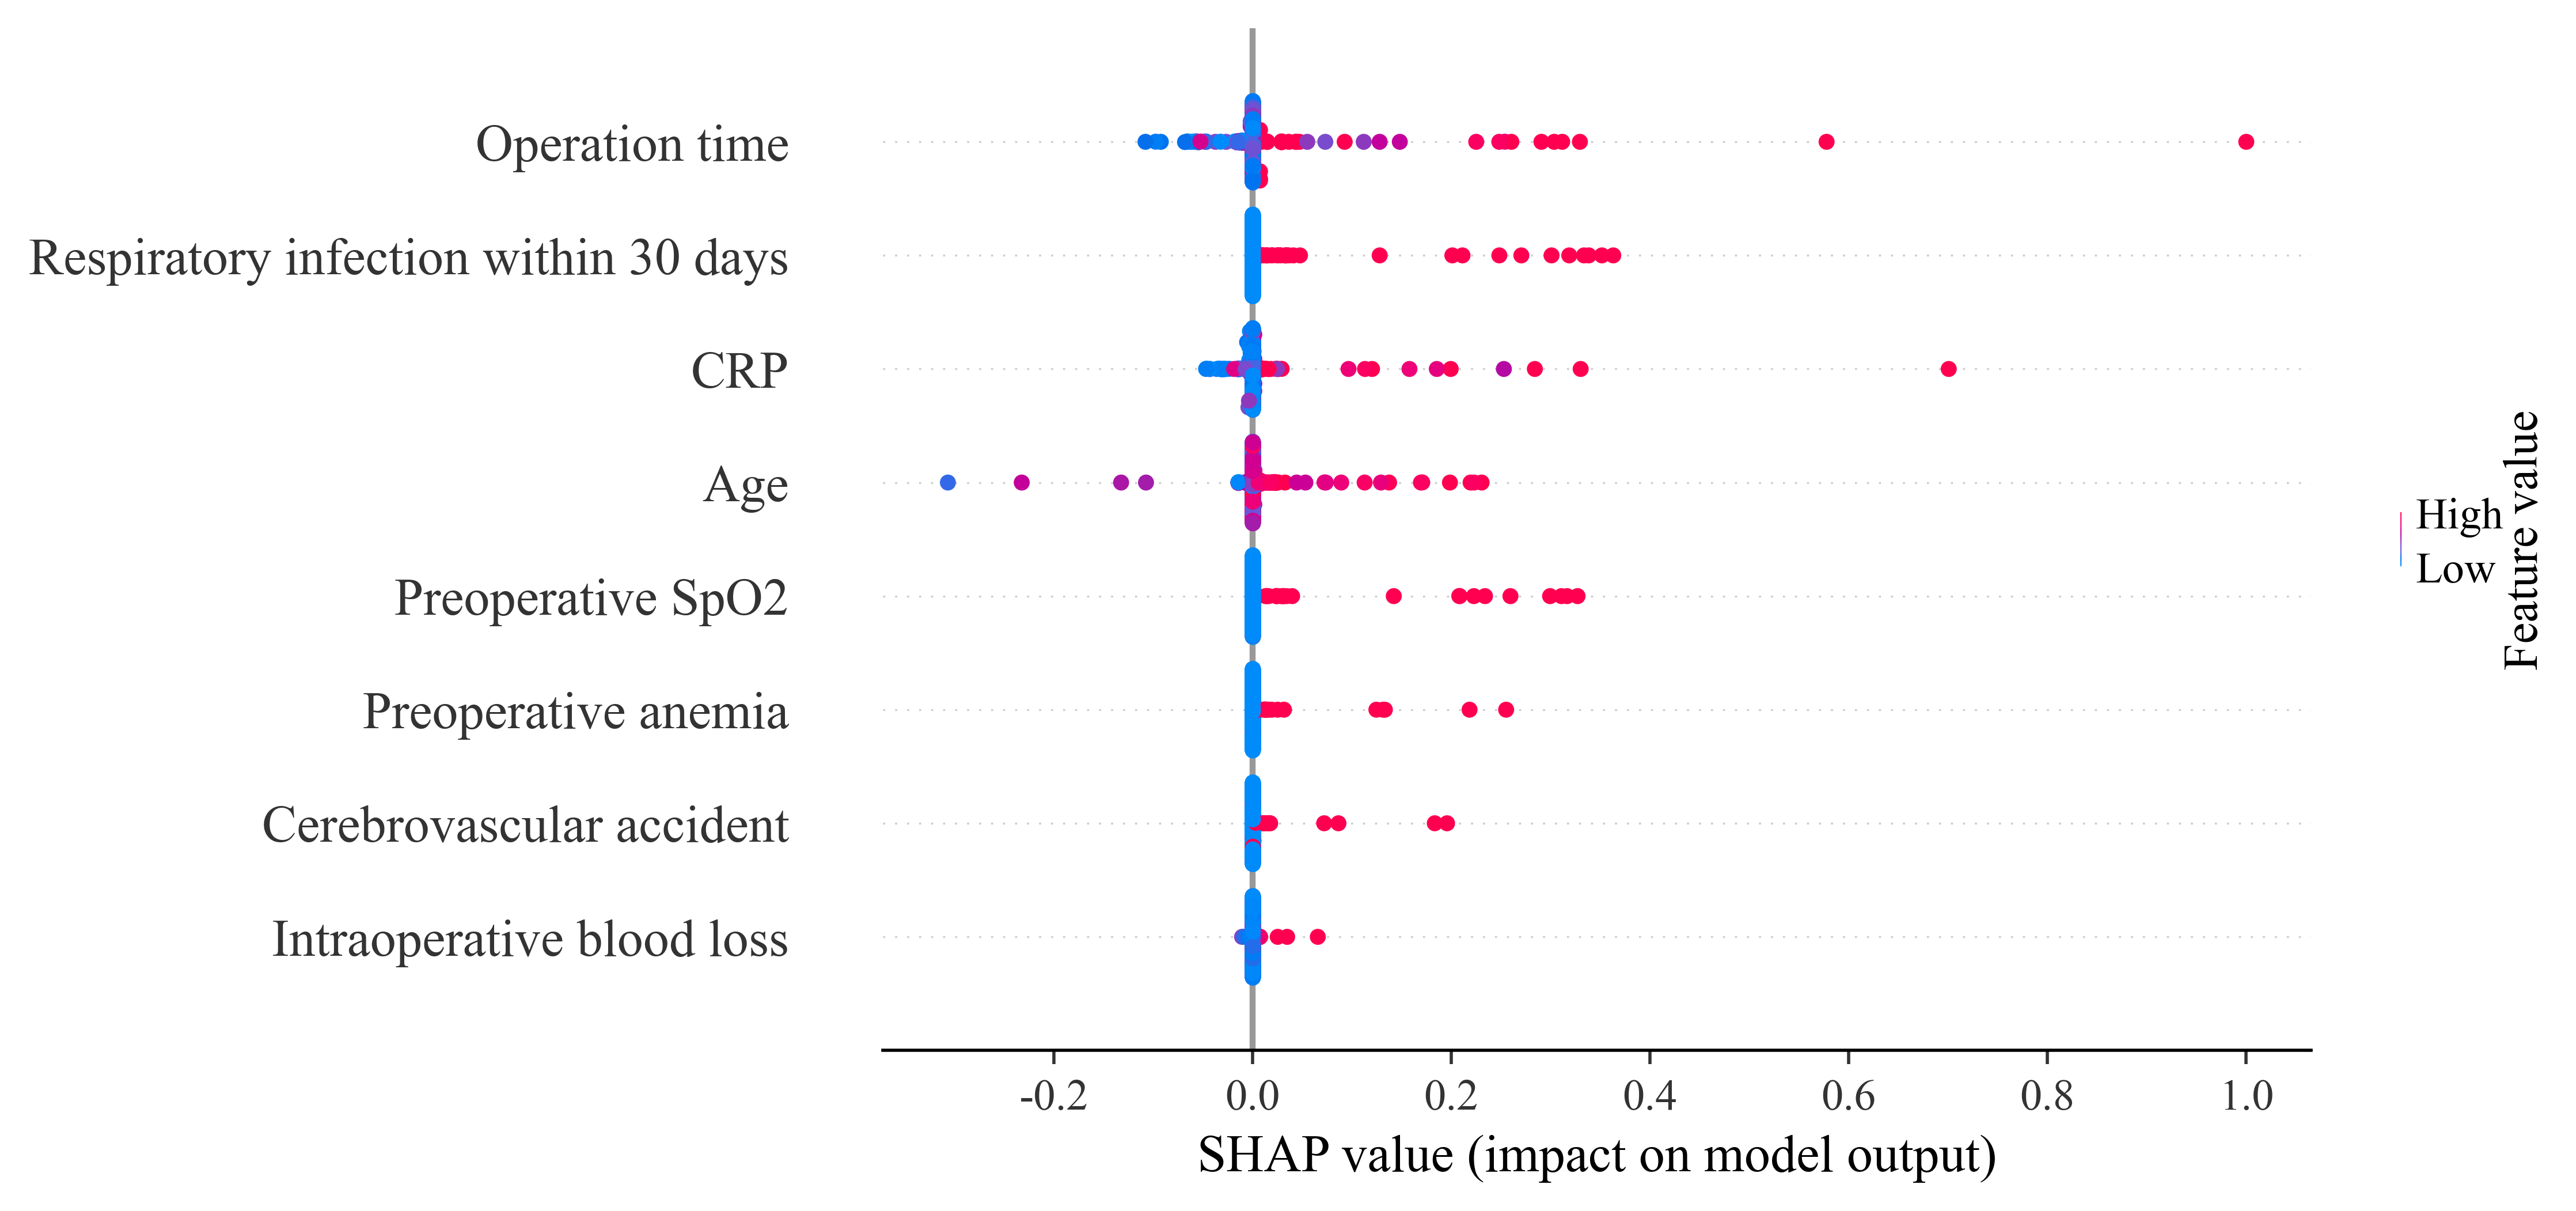

In [46]:
##SHAP计算
import shap
shap.initjs
x_train_summary = shap.kmeans(trainx,5)
explainer_lr=shap.KernelExplainer(lr.predict,x_train_summary)

shap_values= explainer_lr.shap_values(trainx)
plt.figure(dpi=500)
shap.summary_plot(shap_values, trainx, plot_type="bar")
plt.figure(dpi=500)
shap.summary_plot(shap_values, trainx, plot_type='dot')


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/714 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

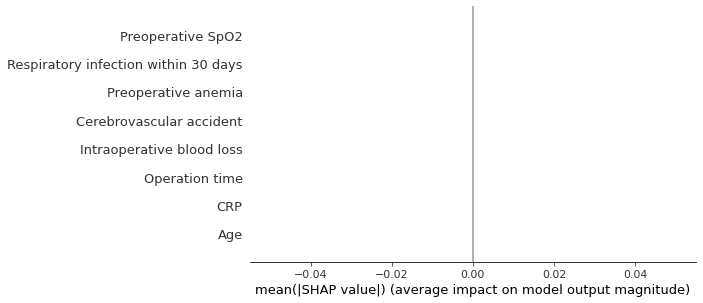

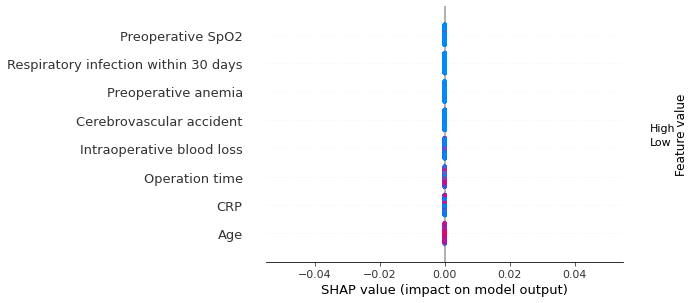

In [42]:
x_train_summary = shap.kmeans(trainx,5)
explainer_svm= shap.KernelExplainer(svm.predict, x_train_summary)
shap_values= explainer_svm.shap_values(trainx)
shap.summary_plot(shap_values, trainx, plot_type="bar")
shap.summary_plot(shap_values, trainx, plot_type='dot')


In [326]:
print(svm)

SVC(C=0.1, class_weight={0: 0.85, 1: 0.15}, decision_function_shape='ovo',
    gamma=0.9, max_iter=100, probability=True, random_state=1, verbose=3)


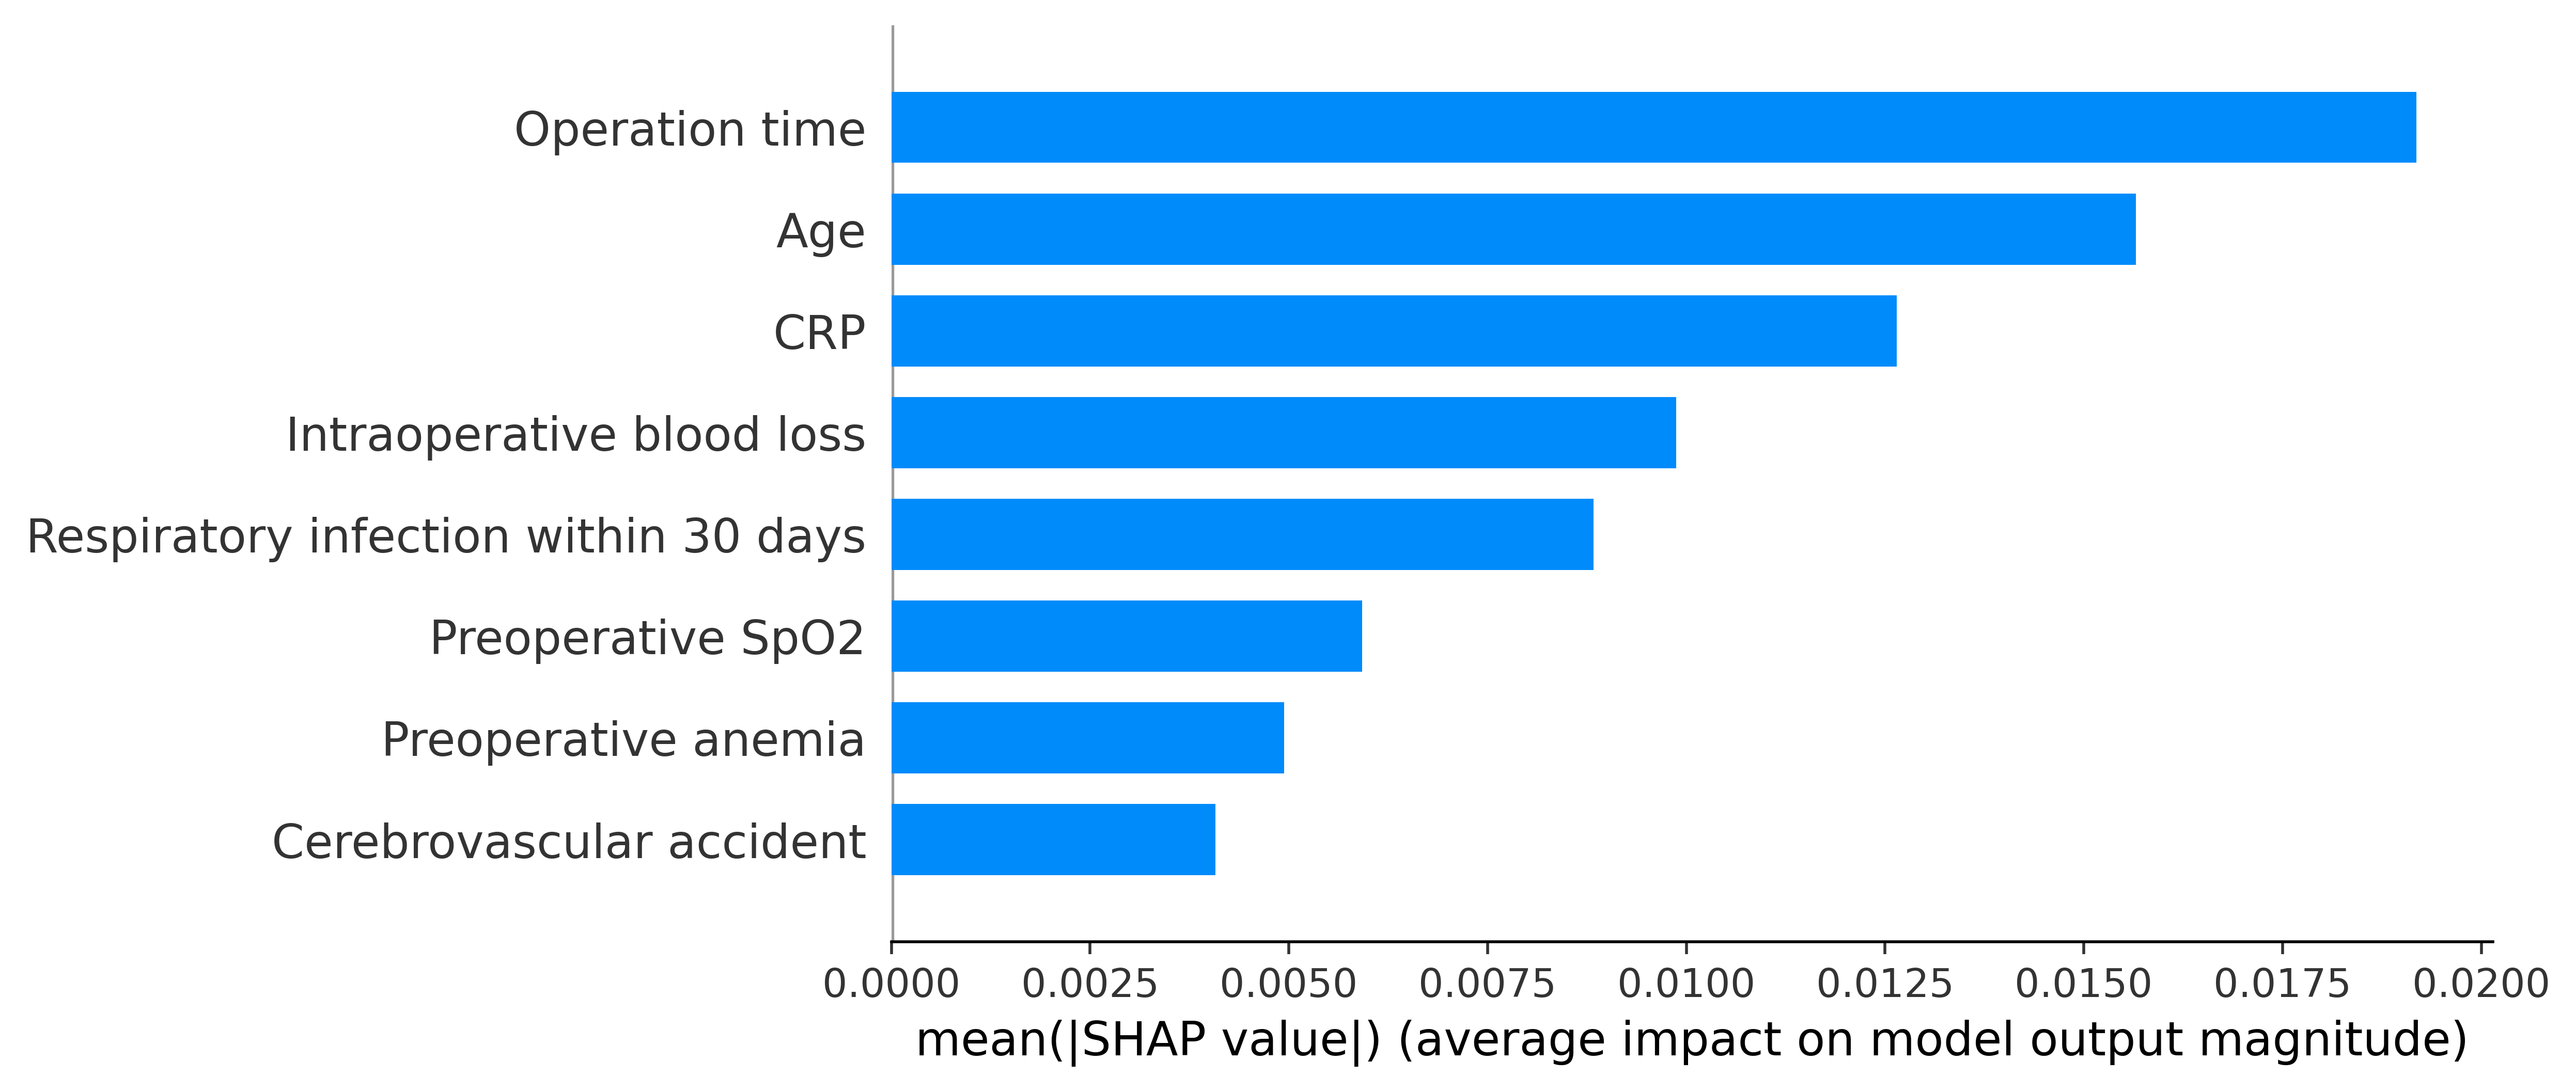

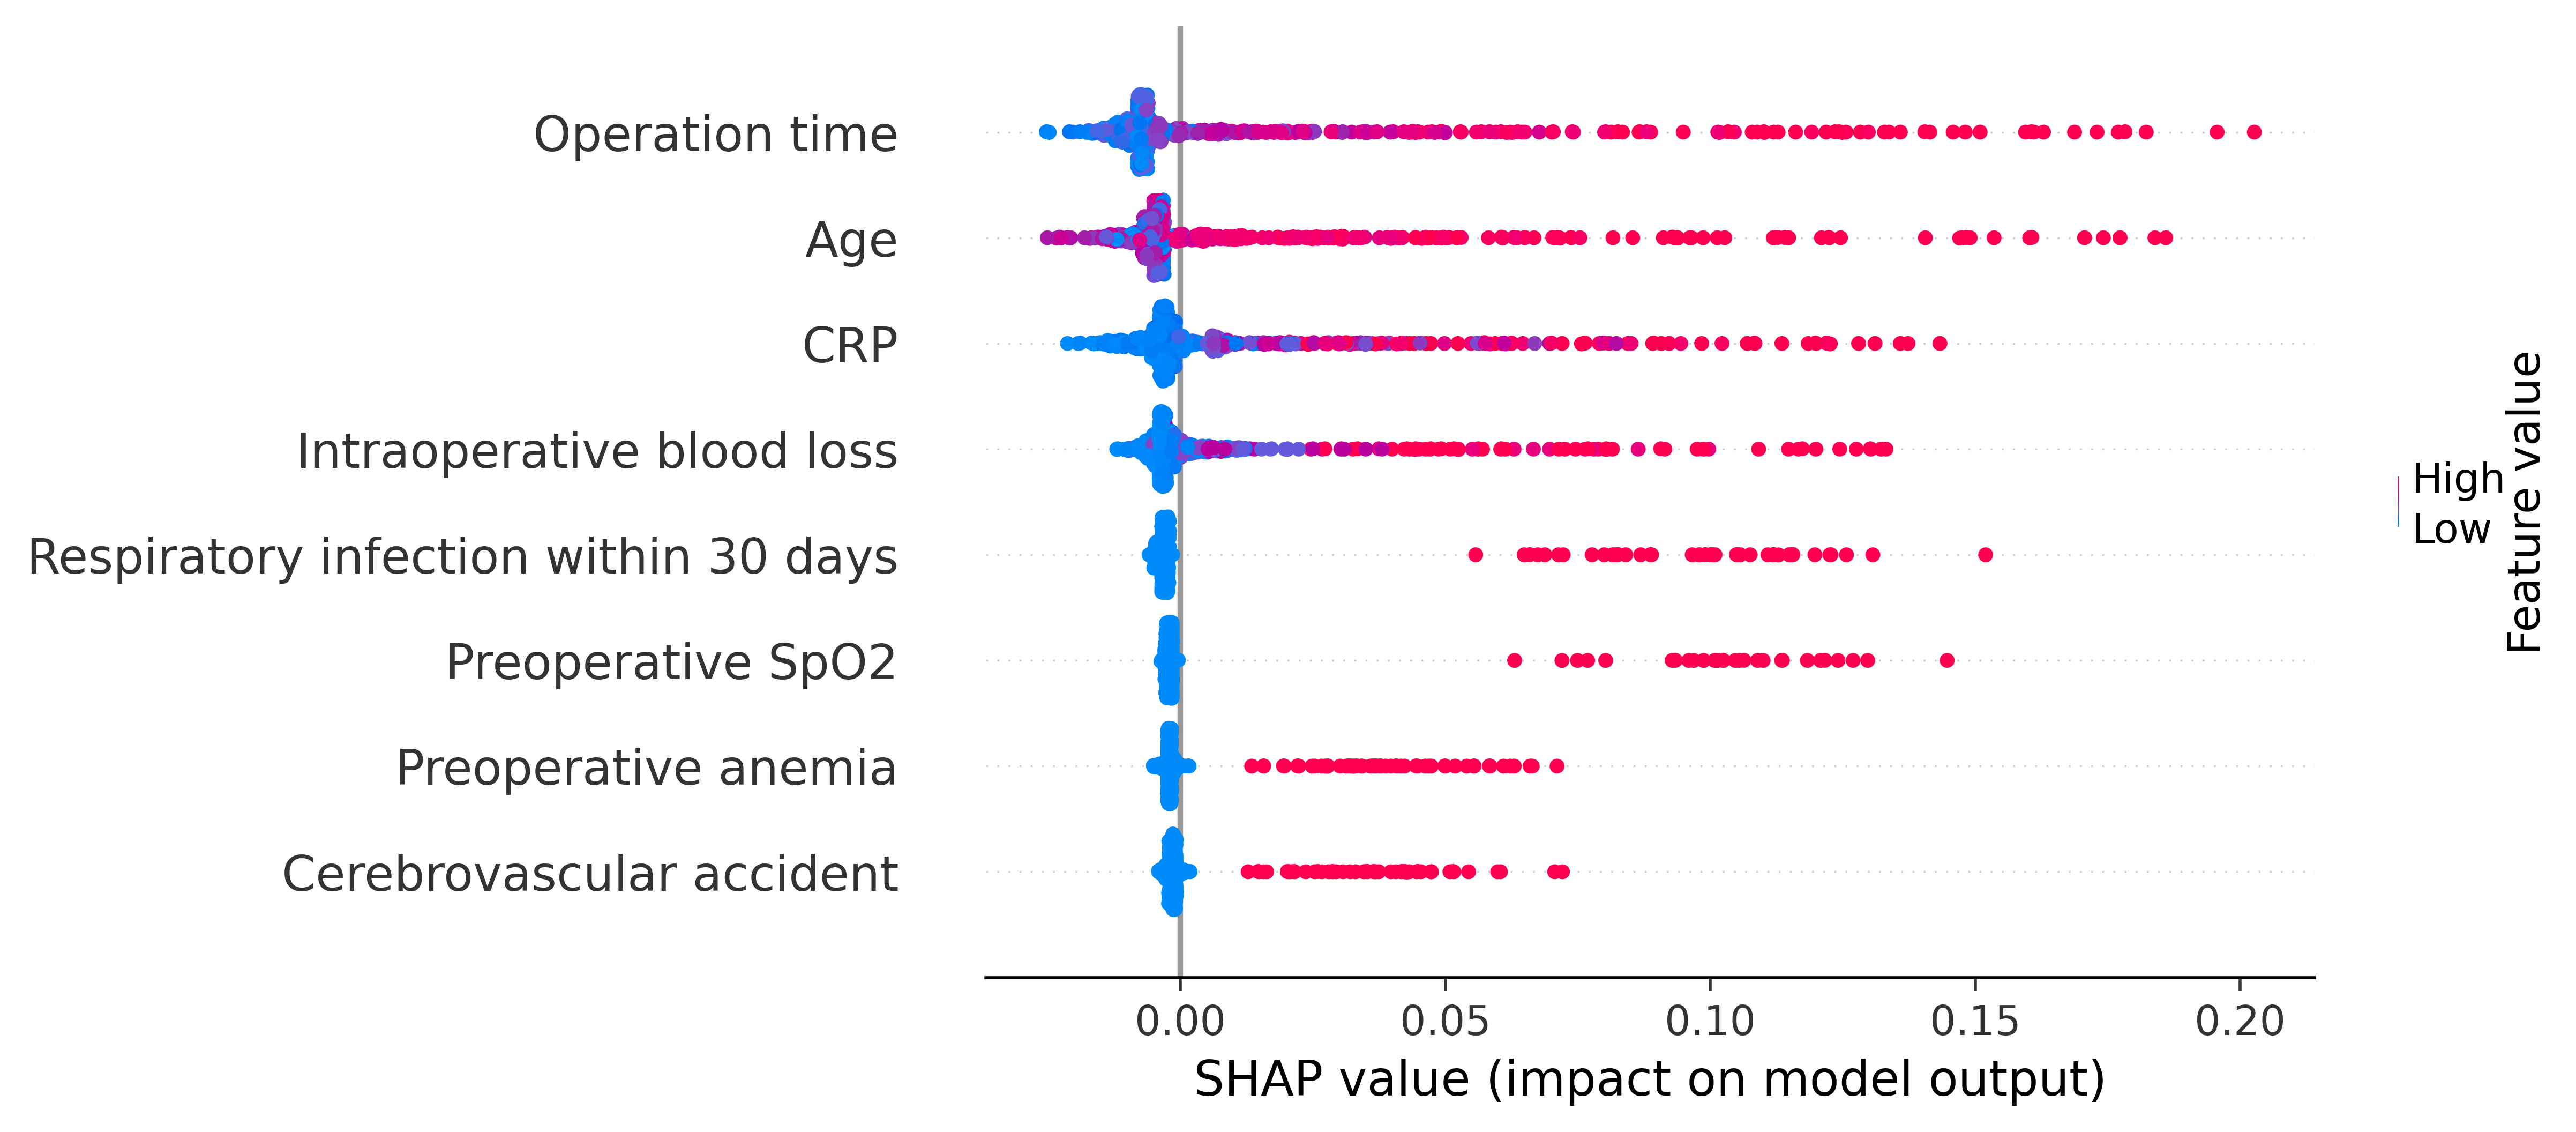

In [41]:
explainer_rfc = shap.TreeExplainer(rfc)

shap_values= explainer_rfc.shap_values(trainx)
plt.figure(dpi=500)
shap.summary_plot(shap_values[1], trainx, plot_type="bar")
plt.figure(dpi=500)
shap.summary_plot(shap_values[1], trainx, plot_type='dot')

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
X does not have valid feature names, but MLPClassifier was fitted with feature names


  0%|          | 0/714 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

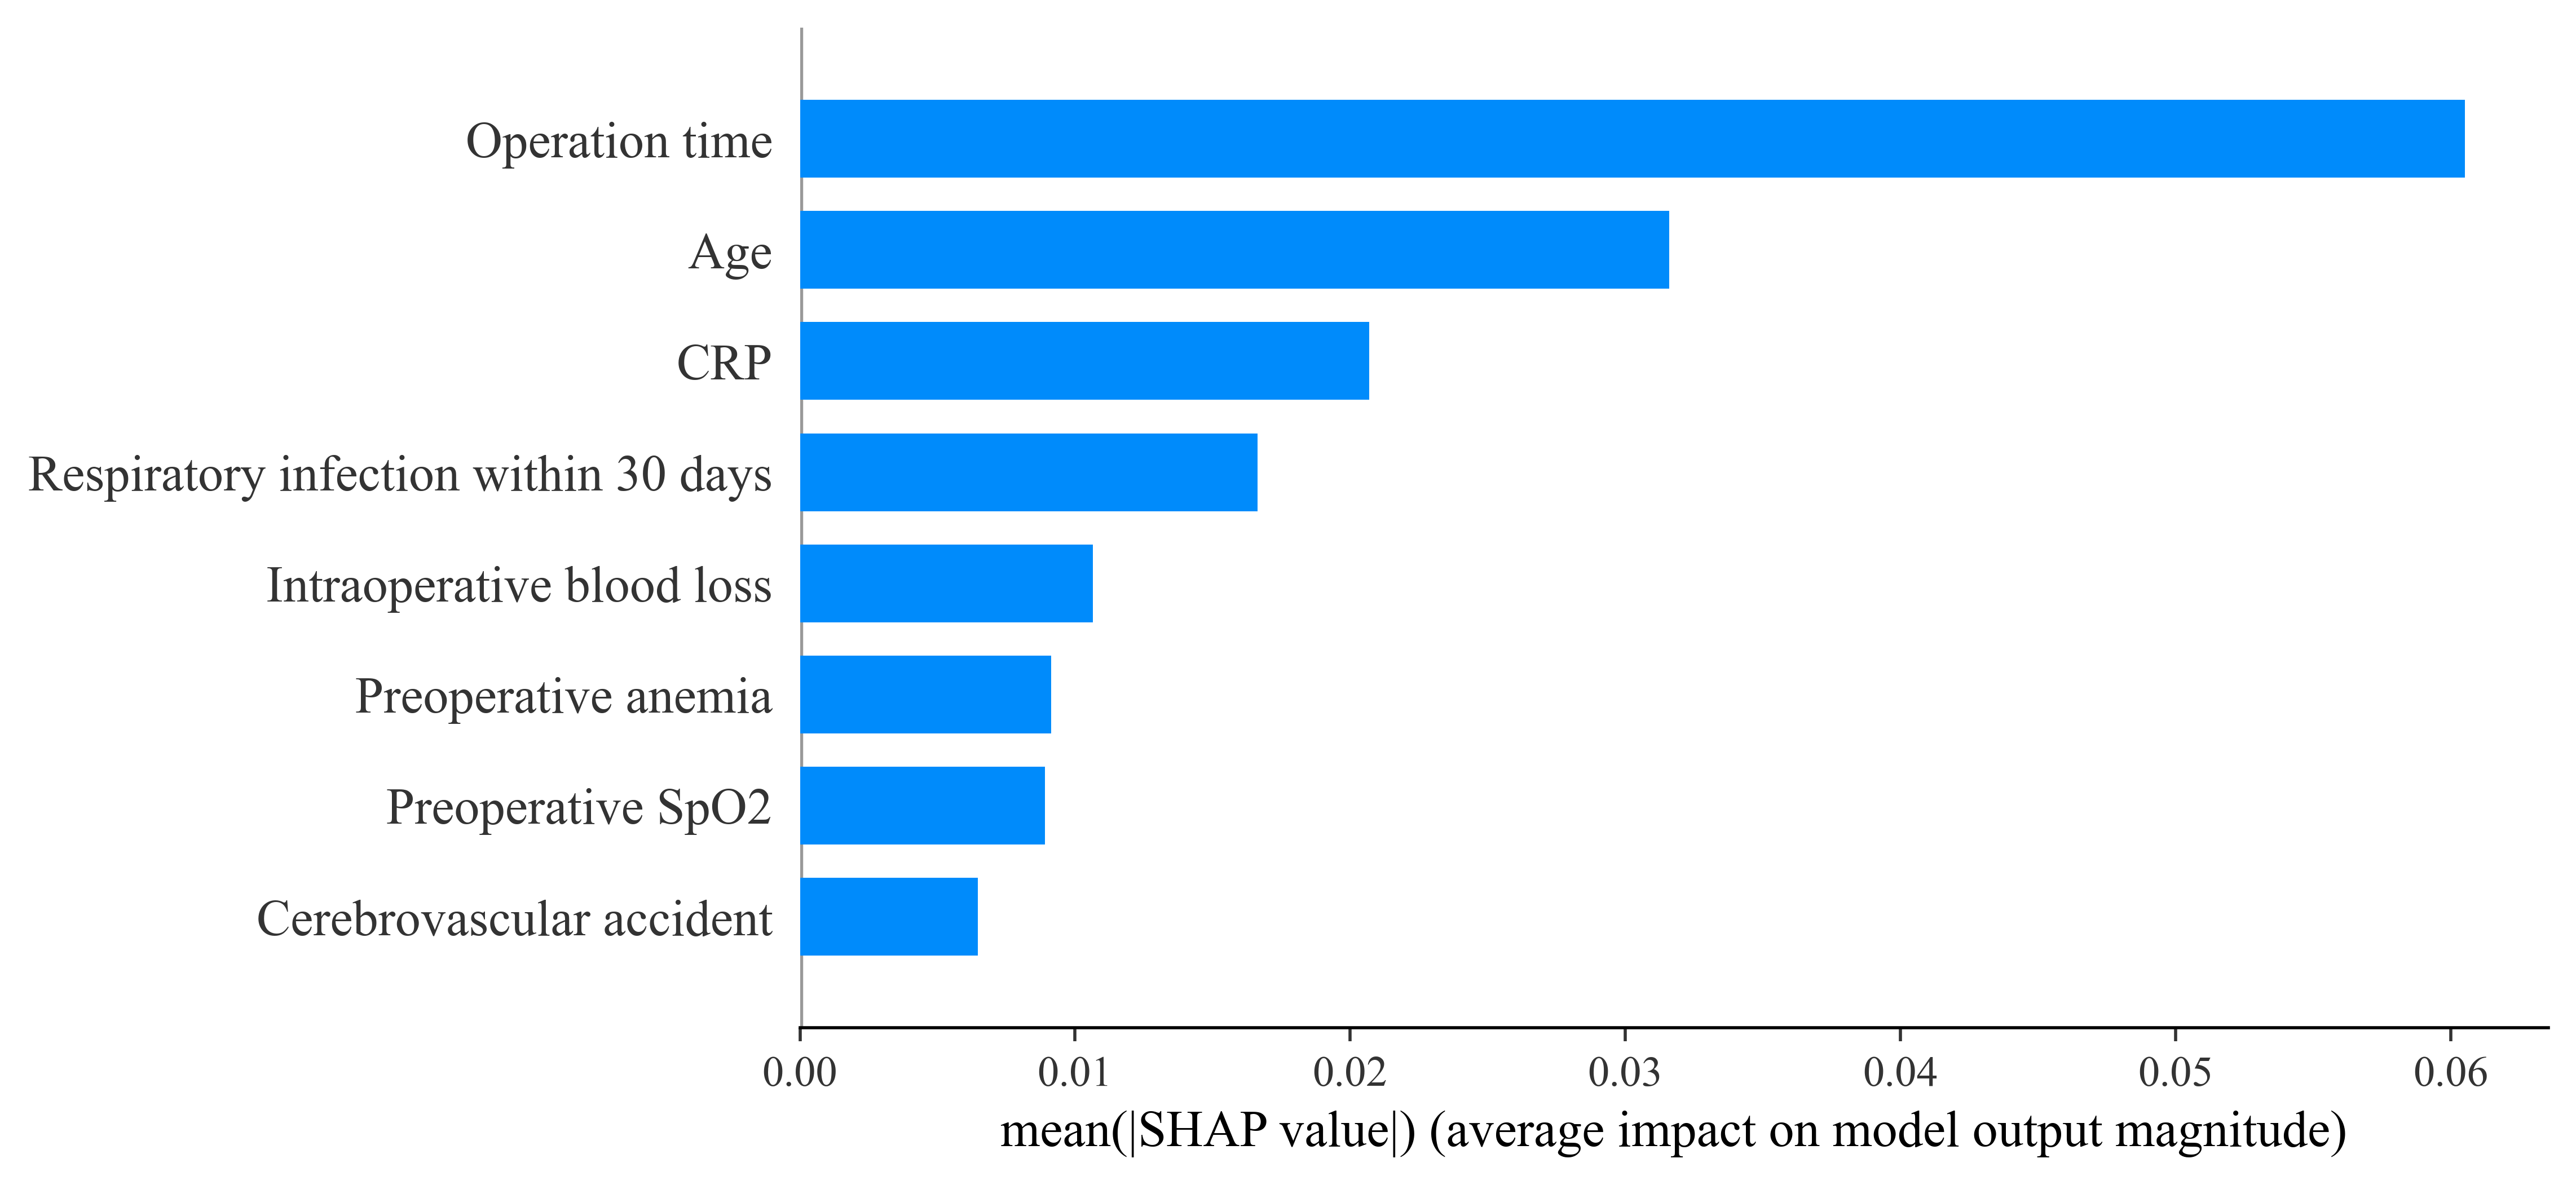

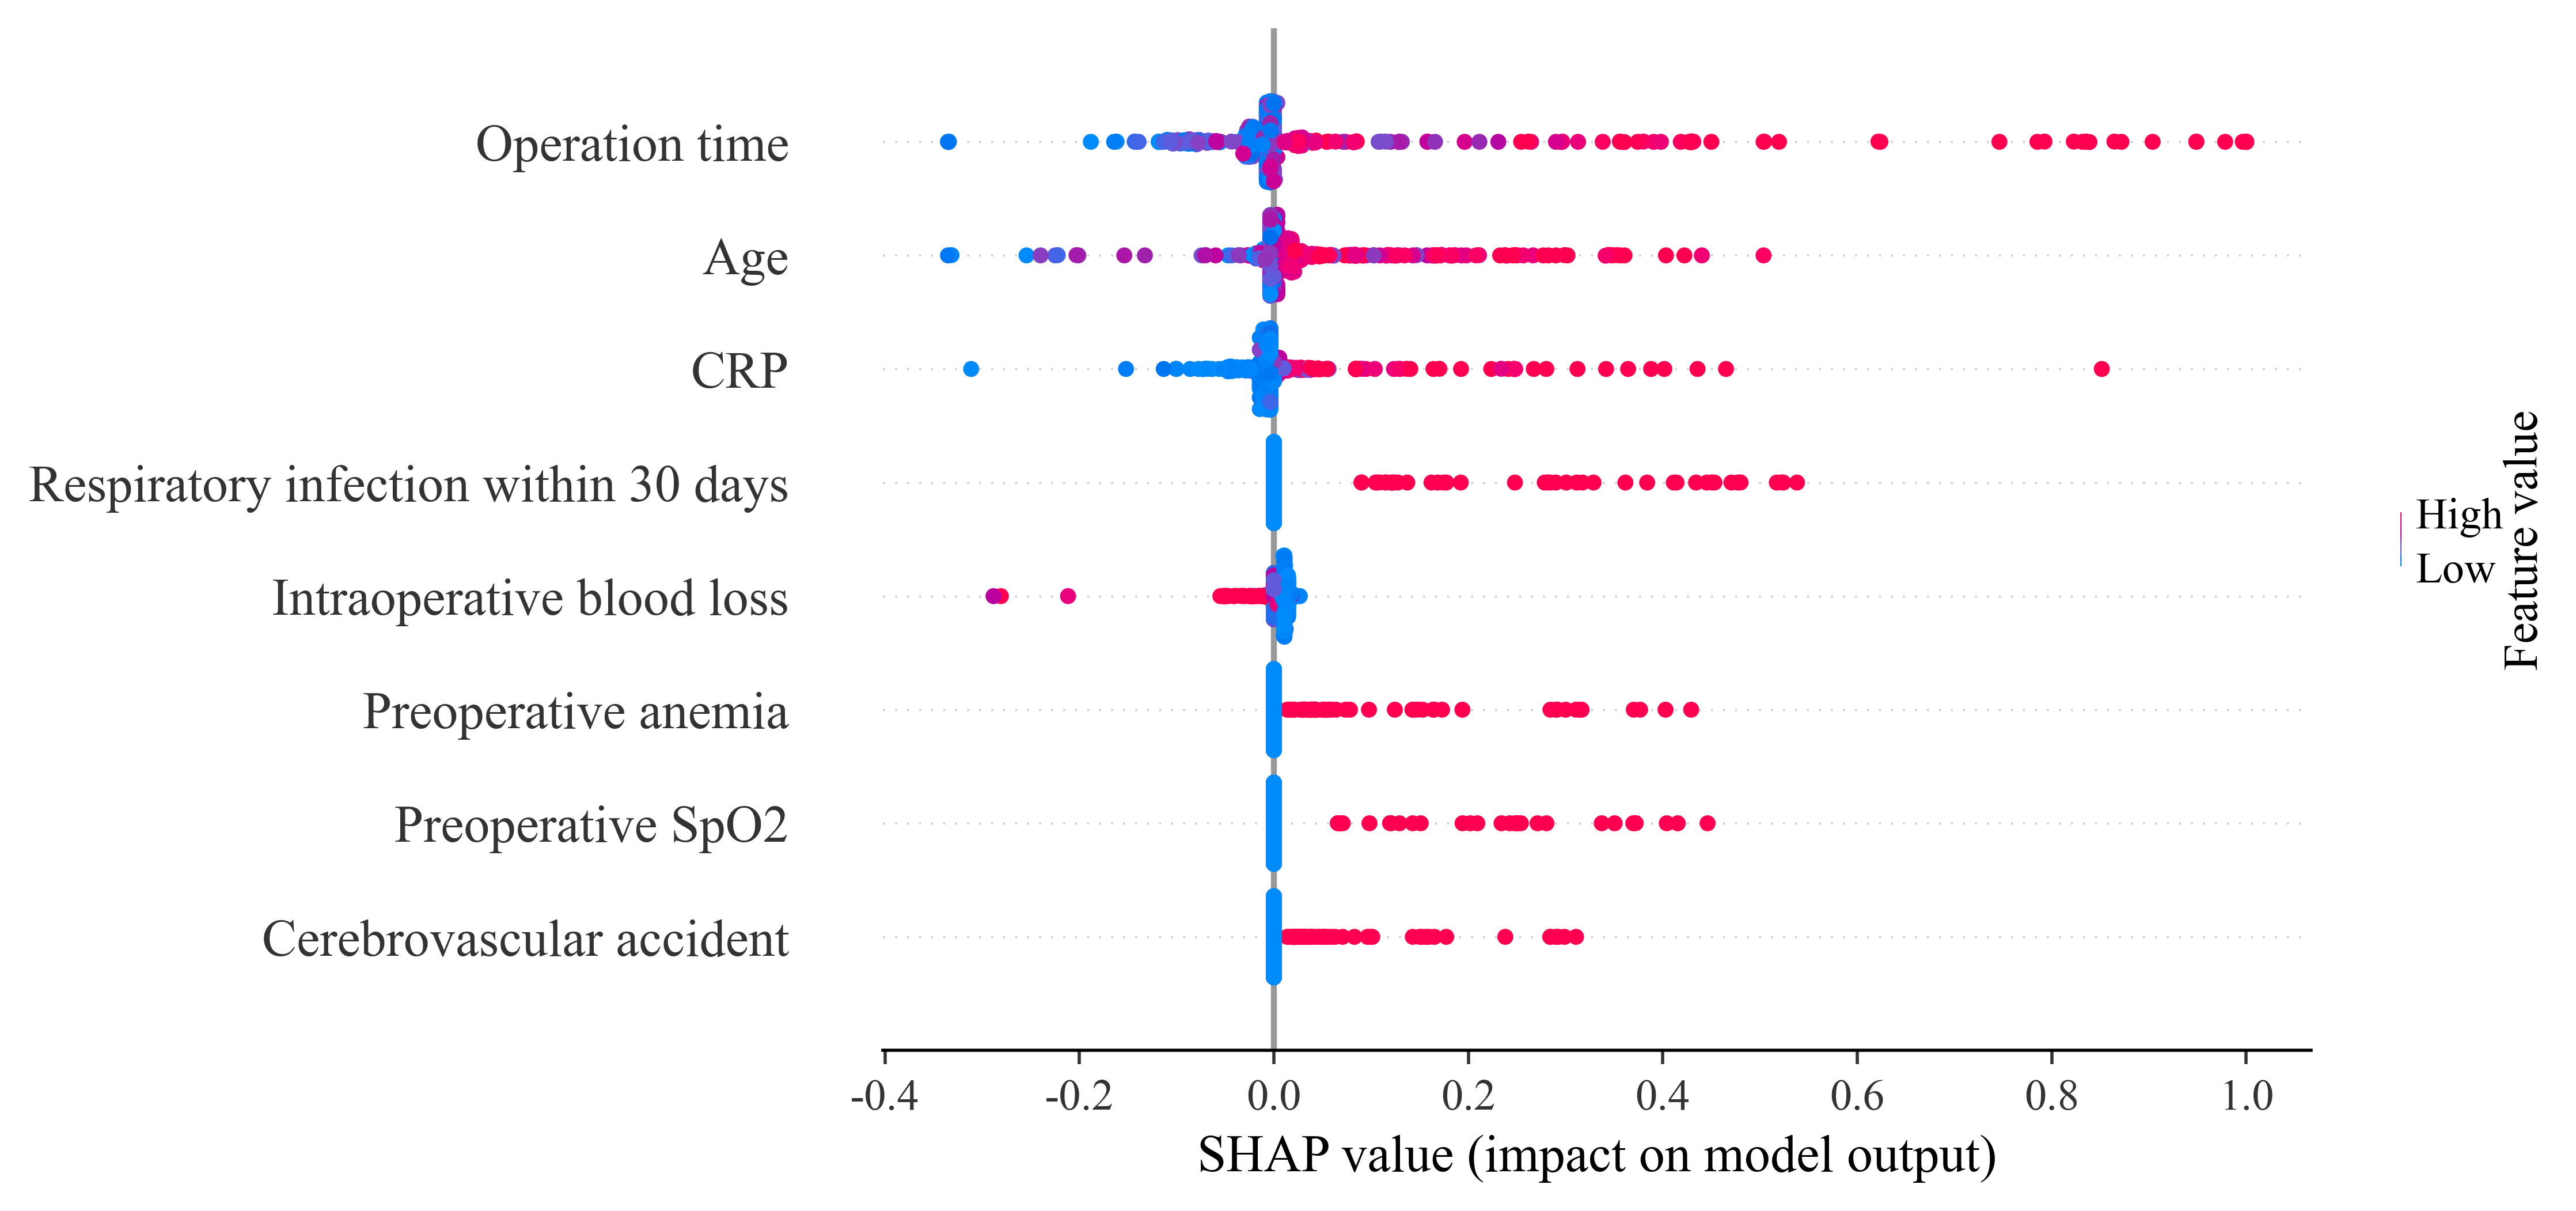

In [49]:
shap.initjs
x_train_summary = shap.kmeans(trainx,5)
explainer_svm = shap.KernelExplainer(mlp.predict,x_train_summary)

shap_values= explainer_svm.shap_values(trainx)
plt.figure(dpi=500)
shap.summary_plot(shap_values, trainx, plot_type="bar")
plt.figure(dpi=500)
shap.summary_plot(shap_values, trainx, plot_type='dot')


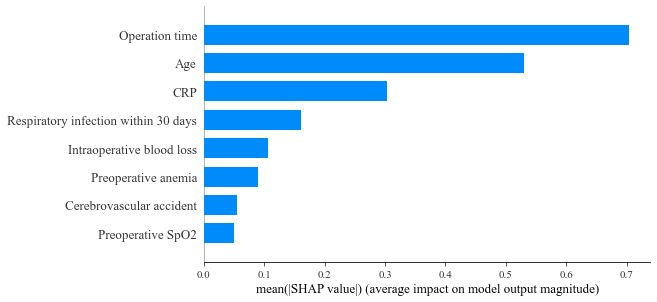

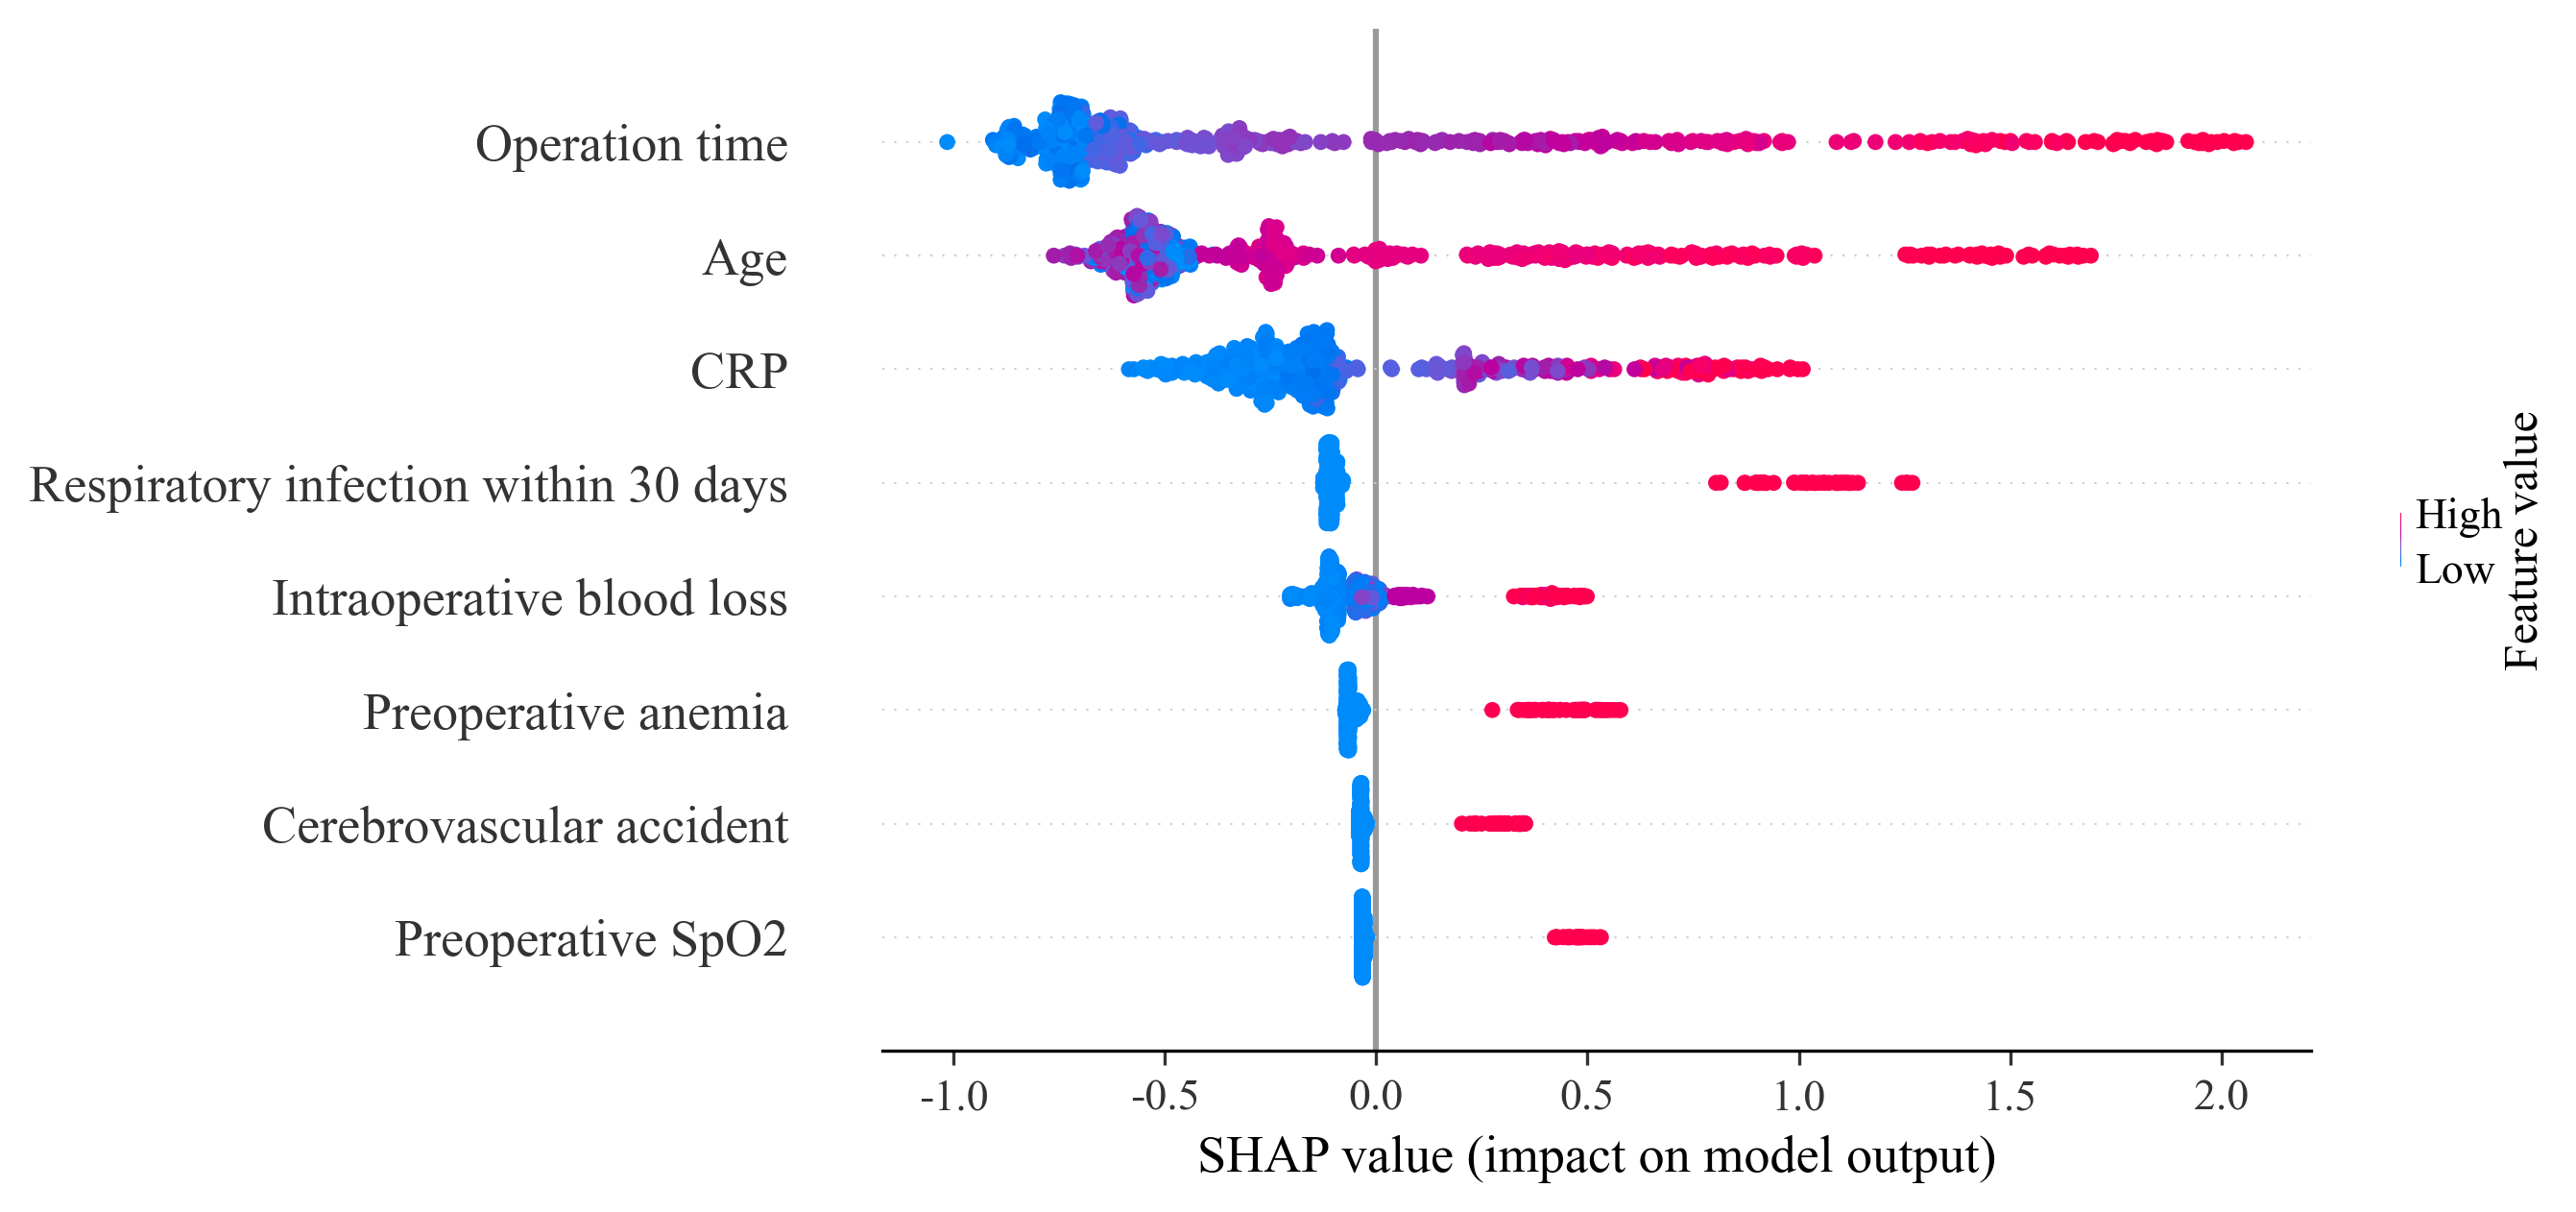

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

In [51]:
explainer_xgb = shap.TreeExplainer(xgb)

shap_values= explainer_xgb.shap_values(trainx)

shap.summary_plot(shap_values, trainx, plot_type="bar")
plt.figure(dpi=300)
shap.summary_plot(shap_values, trainx, plot_type='dot')
plt.figure(dpi=500)

In [60]:
#建立xgboost常数模型

df2=pd.read_csv('train_data.csv',encoding='gbk')

df2.head
df2.PPCs.value_counts()
df2.PPCs=df2.PPCs.map({'Without PPCs':0,'With PPCs':1}).astype(int)
df2['Respiratory infection within 30 days']=df2['Respiratory infection within 30 days'].map({'No':0,'Yes':1}).astype(int)
df2['Preoperative anemia']=df2['Preoperative anemia'].map({'No':0,'Yes':1}).astype(int)
df2['Preoperative SpO2']=df2['Preoperative SpO2'].map({'≥96%':0,'<96%':1}).astype(int)
df2['Cerebrovascular accident']=df2['Cerebrovascular accident'].map({'No':0,'Yes':1}).astype(int)

trainy1=df2.PPCs
trainy1.head()
trainx1=df2.drop('PPCs',axis=1)
trainx1.head()


df3=pd.read_csv('test_data.csv',encoding='gbk')
df3.head
df3.PPCs.value_counts()
df3.PPCs=df3.PPCs.map({'Without PPCs':0,'With PPCs':1}).astype(int)
df3['Respiratory infection within 30 days']=df3['Respiratory infection within 30 days'].map({'No':0,'Yes':1}).astype(int)
df3['Preoperative anemia']=df3['Preoperative anemia'].map({'No':0,'Yes':1}).astype(int)
df3['Preoperative SpO2']=df3['Preoperative SpO2'].map({'≥96%':0,'<96%':1}).astype(int)
df3['Cerebrovascular accident']=df3['Cerebrovascular accident'].map({'No':0,'Yes':1}).astype(int)

testy1=df3.PPCs
testy1.head()
testx1=df3.drop('PPCs',axis=1)
testx1.head()


Age   CRP  Operation time  Intraoperative blood loss  \
0   54  48.1             145                        500   
1   49   2.7              20                          0   
2   69   5.7             135                          0   
3   75   4.7             105                          0   
4   56   0.2             100                         50   

   Cerebrovascular accident  Preoperative anemia  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    1   
4                         0                    0   

   Respiratory infection within 30 days  Preoperative SpO2  
0                                     0                  0  
1                                     0                  0  
2                                     0                  0  
3                                     0                  0  
4                                     0                  0

In [61]:
#
###训练模型

xgb1= XGBClassifier(colsample_bytree=1,gamma=1,learning_rate=0.01,max_depth=2,
                    n_estimators =400,min_child_weight=1,subsample=0.5,
                    objective= 'binary:logistic',random_state = 1)
xgb1.fit(trainx1,trainy1)
pred_xgb1 = xgb1.predict_proba(trainx1)

In [62]:
###xgboost lime解释器
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
  
matplotlib.rcParams['font.size'] =20

explainer= lime.lime_tabular.LimeTabularExplainer(training_data=np.array(trainx1),feature_names= trainx1.columns,
                                                  class_names=['Without PPCs','With PPCs'],
                                                  mode='classification')

exp = explainer.explain_instance(data_row=testx1.iloc[26], predict_fn=xgb1.predict_proba)

fig2=exp.show_in_notebook(show_table=True,show_all=False)



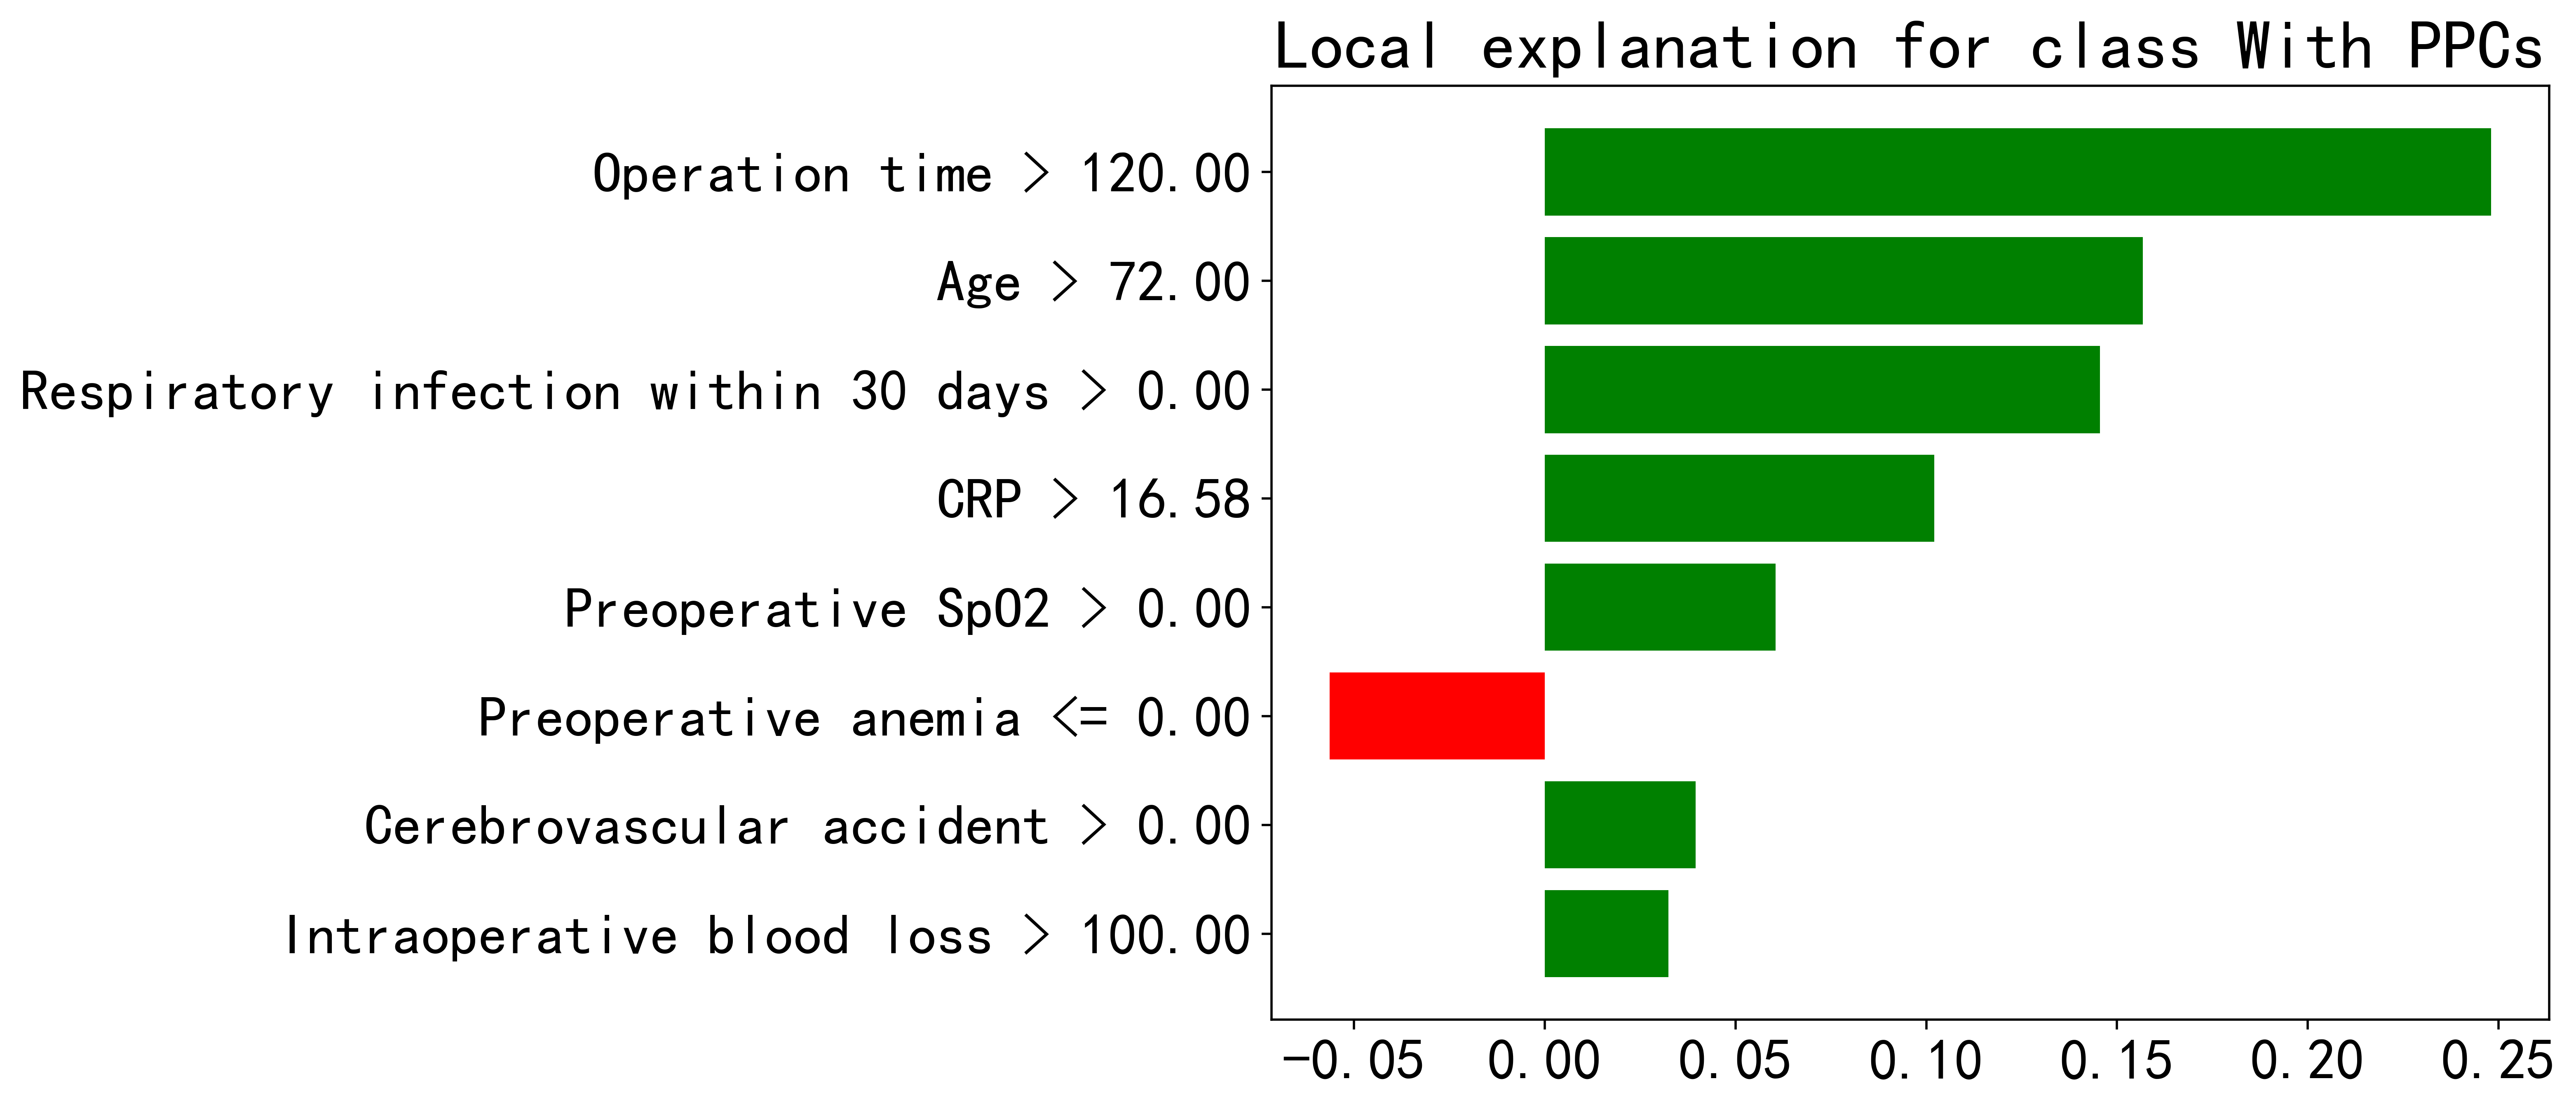

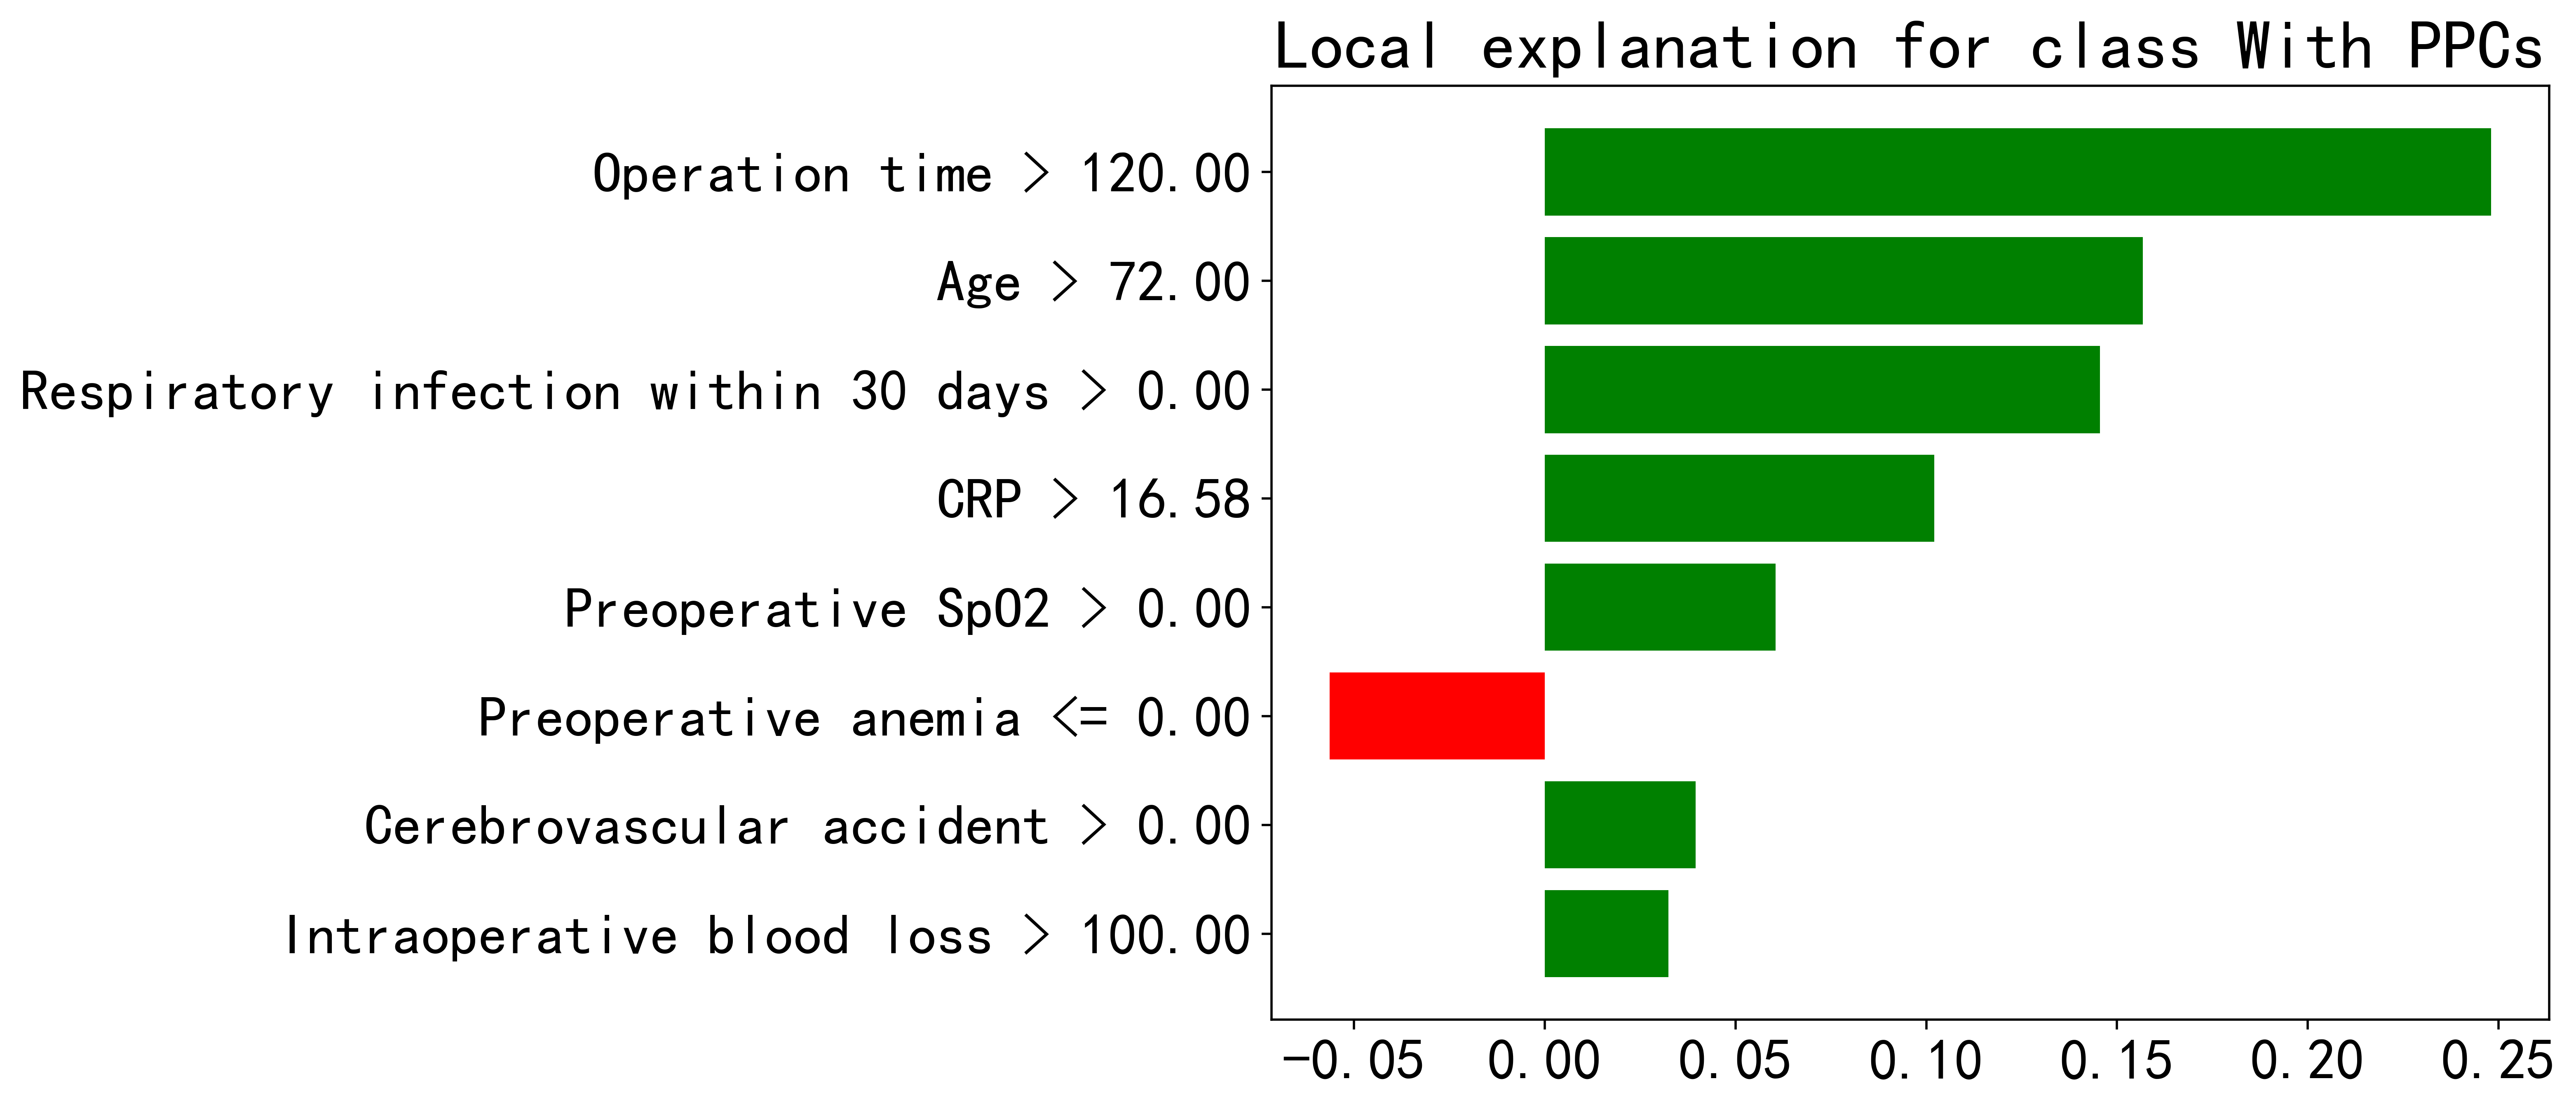

In [63]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['figure.dpi']=500
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False
exp.as_pyplot_figure(label=1)